## 1. Basic Requirements

### 1.1 Importing Important Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import warnings
warnings.filterwarnings('ignore')

### 1.2 Dataset used for analysis

https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

### 1.3 Some Important Information about Dataset #
**ID:** of each client  
**LIMIT_BAL:** Amount of given credit in NT dollars (includes individual and family/supplementary credit)  
**SEX:** Gender (1=male, 2=female)  
**EDUCATION:** (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)  
**MARRIAGE:** Marital status (1=married, 2=single, 3=others)  
**AGE:** Age in years  
**PAY_0:** Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)  
**PAY_2:** Repayment status in August, 2005 (scale same as above)  
**PAY_3:** Repayment status in July, 2005 (scale same as above)  
**PAY_4:** Repayment status in June, 2005 (scale same as above)  
**PAY_5:** Repayment status in May, 2005 (scale same as above)  
**PAY_6:** Repayment status in April, 2005 (scale same as above)  
**BILL_AMT1:** Amount of bill statement in September, 2005 (NT dollar)  
**BILL_AMT2:** Amount of bill statement in August, 2005 (NT dollar)  
**BILL_AMT3:** Amount of bill statement in July, 2005 (NT dollar)  
**BILL_AMT4:** Amount of bill statement in June, 2005 (NT dollar)  
**BILL_AMT5:** Amount of bill statement in May, 2005 (NT dollar)  
**BILL_AMT6:** Amount of bill statement in April, 2005 (NT dollar)  
**PAY_AMT1:** Amount of previous payment in September, 2005 (NT dollar)  
**PAY_AMT2:** Amount of previous payment in August, 2005 (NT dollar)  
**PAY_AMT3:** Amount of previous payment in July, 2005 (NT dollar)  
**PAY_AMT4:** Amount of previous payment in June, 2005 (NT dollar)  
**PAY_AMT5:** Amount of previous payment in May, 2005 (NT dollar)  
**PAY_AMT6:** Amount of previous payment in April, 2005 (NT dollar)  
**default.payment.next.month:** Default payment (1=yes, 0=no)  

## 2. Loading Data
'Data.csv'

### 2.1 Reading Data using pandas

In [3]:
df = pd.read_csv('../artifacts/Data.csv')

#### 2.1.1 First 5 rows of the dataset

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### 2.1.2 Checking no. of columns with diffrent datatypes

In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

We see that all the columns are int64 type whereas from previous knowledge we know that SEX, EDUCATION, MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6, default_payment_next_month are categorical features. So we convert these features in categorical in up

#### 2.1.3 Checking the summary for the numeric columns

In [6]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### 2.1.4 Number of null values in each column

In [7]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### 2.1.5 Unique values for each column

In [8]:
columns = df.columns

for i in range(df.shape[1]):
    print(f"{columns[i]}: ", df[columns[i]].unique())

ID:  [    1     2     3 ... 29998 29999 30000]
LIMIT_BAL:  [  20000.  120000.   90000.   50000.  500000.  100000.  140000.  200000.
  260000.  630000.   70000.  250000.  320000.  360000.  180000.  130000.
  450000.   60000.  230000.  160000.  280000.   10000.   40000.  210000.
  150000.  380000.  310000.  400000.   80000.  290000.  340000.  300000.
   30000.  240000.  470000.  480000.  350000.  330000.  110000.  420000.
  170000.  370000.  270000.  220000.  190000.  510000.  460000.  440000.
  410000.  490000.  390000.  580000.  600000.  620000.  610000.  700000.
  670000.  680000.  430000.  550000.  540000. 1000000.  530000.  710000.
  560000.  520000.  750000.  640000.   16000.  570000.  590000.  660000.
  720000.  327680.  740000.  800000.  760000.  690000.  650000.  780000.
  730000.]
SEX:  [2 1]
EDUCATION:  [2 1 3 5 4 6 0]
MARRIAGE:  [1 2 3 0]
AGE:  [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21

#### 2.1.6 Total no. of unique values in each column

In [9]:
columns = df.columns

for i in range(df.shape[1]):
    print(f"{columns[i]}:  {len(df[columns[i]].unique())}")

ID:  30000
LIMIT_BAL:  81
SEX:  2
EDUCATION:  7
MARRIAGE:  4
AGE:  56
PAY_0:  11
PAY_2:  11
PAY_3:  11
PAY_4:  11
PAY_5:  10
PAY_6:  10
BILL_AMT1:  22723
BILL_AMT2:  22346
BILL_AMT3:  22026
BILL_AMT4:  21548
BILL_AMT5:  21010
BILL_AMT6:  20604
PAY_AMT1:  7943
PAY_AMT2:  7899
PAY_AMT3:  7518
PAY_AMT4:  6937
PAY_AMT5:  6897
PAY_AMT6:  6939
default.payment.next.month:  2


#### 2.2.1   Changin the name of 'PAY_0' column to 'PAY_1' and  'default.payment.next.month' to 'target'

In [10]:
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
df.rename(columns={'default.payment.next.month':'default'}, inplace=True)

In [11]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default'],
      dtype='object')

#### SEX AND EDUCATION

In [12]:
df['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

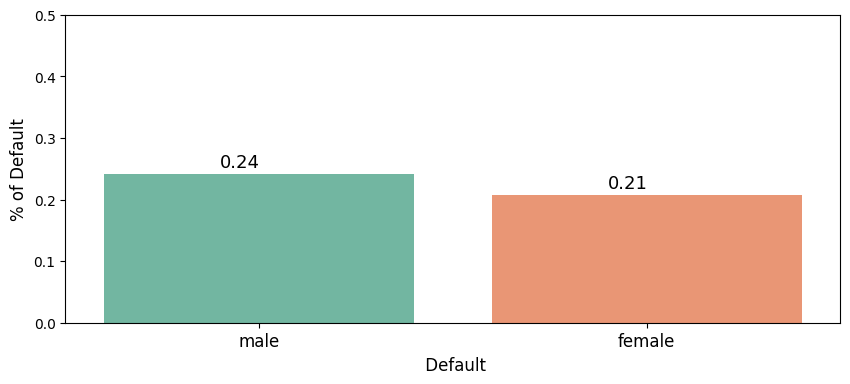

In [13]:
plt.figure(figsize=(10, 4))
ax =sns.barplot(x='SEX',y='default', data=df, palette="Set2",  ci=None)
plt.xlabel(" Default", fontsize=12)
plt.ylim(0,0.5)
plt.ylabel("% of Default", fontsize=12)
plt.xticks([0,1],['male','female'],fontsize=12)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.01),fontsize=13)
plt.show()

In [14]:
df['default'].groupby(df['SEX']).value_counts(normalize=True)

SEX  default
1    0          0.758328
     1          0.241672
2    0          0.792237
     1          0.207763
Name: proportion, dtype: float64

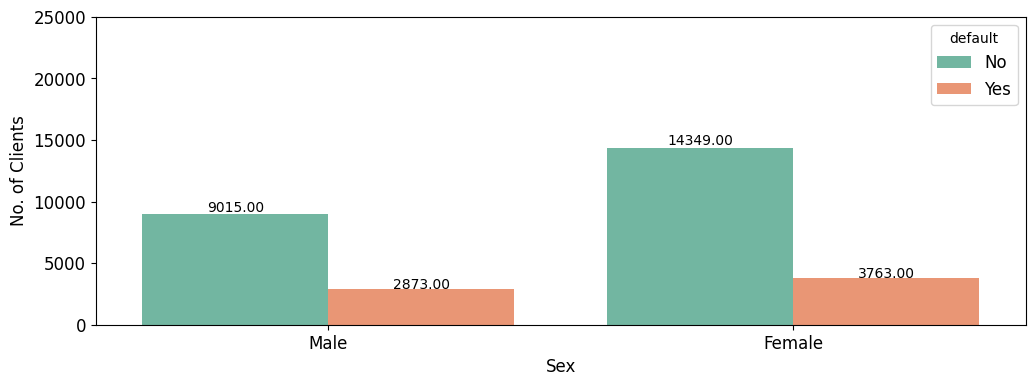

In [15]:
plt.figure(figsize=(12,4))
ax= sns.countplot(data=df,x = 'SEX',hue='default',palette='Set2')
plt.xlabel("Sex", fontsize=12)
plt.ylabel("No. of Clients", fontsize=12)
plt.ylim(0,25000)
plt.xticks([0,1],['Male','Female'],fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0.01:  # Only annotate bars with height > 0.01
        ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center')
plt.legend(['No','Yes'],fontsize=12, title='default')
plt.show()

In [16]:
df['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [17]:
df['EDUCATION'].replace([0,5,6],5,inplace=True)

In [18]:
df['default'].groupby(df['EDUCATION']).value_counts(normalize=True)

EDUCATION  default
1          0          0.807652
           1          0.192348
2          0          0.762651
           1          0.237349
3          0          0.748424
           1          0.251576
4          0          0.943089
           1          0.056911
5          0          0.924638
           1          0.075362
Name: proportion, dtype: float64

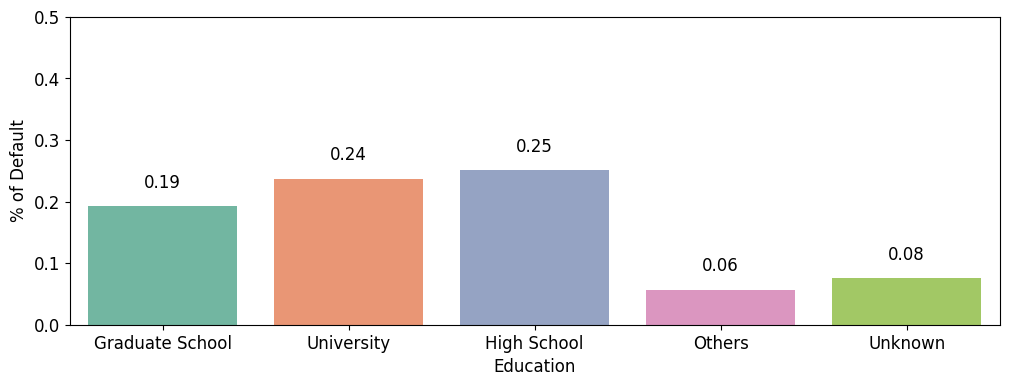

In [19]:
plt.figure(figsize=(12,4))
ax= sns.barplot(x = 'EDUCATION',y='default',data=df,palette='Set2',errorbar = None)
plt.xlabel("Education", fontsize=12)
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3,4],['Graduate School','University','High School','Others','Unknown'],fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=12)
plt.show()

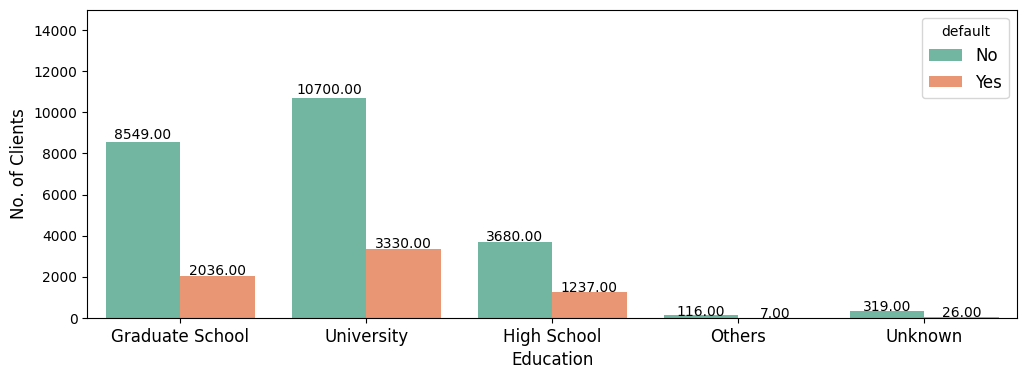

In [20]:
plt.figure(figsize=(12,4))
ax = sns.countplot(data=df,x='EDUCATION',hue='default',palette='Set2')
plt.xlabel("Education", fontsize=12)
plt.ylabel("No. of Clients", fontsize=12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3,4],['Graduate School','University','High School','Others','Unknown'],fontsize=12)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0.01:  # Only annotate bars with height > 0.01
        ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center')
plt.legend(['No','Yes'],fontsize=12, title='default')
plt.show()

#### MARITAL STATUS

In [21]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [22]:
df['default'].groupby(df['MARRIAGE']).value_counts(normalize=True)

MARRIAGE  default
0         0          0.907407
          1          0.092593
1         0          0.765283
          1          0.234717
2         0          0.790717
          1          0.209283
3         0          0.739938
          1          0.260062
Name: proportion, dtype: float64

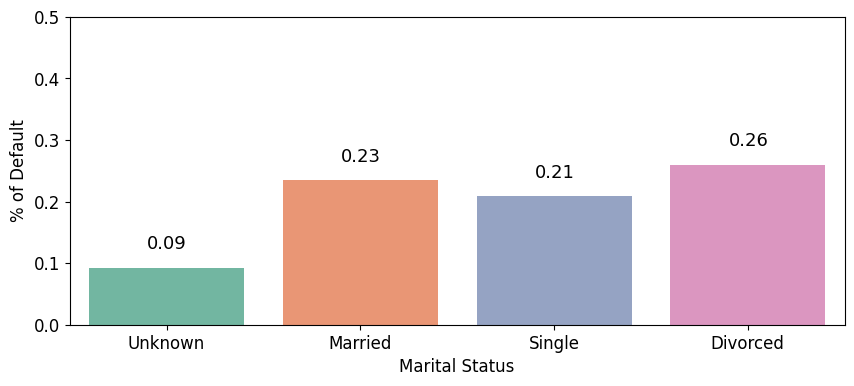

In [23]:
plt.figure(figsize=(10,4))
ax= sns.barplot(data=df,x = 'MARRIAGE',y='default',palette='Set2',errorbar=None)
plt.xlabel("Marital Status", fontsize=12)
plt.ylabel("% of Default", fontsize=12)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown','Married','Single','Divorced'],fontsize=12)
plt.yticks(fontsize=12)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.03),fontsize=13)

plt.show()

#### (Sex + Education)/Marital Status

In [24]:
df.groupby(by = ['MARRIAGE','SEX'])['default'].value_counts(normalize=True)

MARRIAGE  SEX  default
0         1    0          0.857143
               1          0.142857
          2    0          0.925000
               1          0.075000
1         1    0          0.740655
               1          0.259345
          2    0          0.780375
               1          0.219625
2         1    0          0.773386
               1          0.226614
          2    0          0.802784
               1          0.197216
3         1    0          0.694656
               1          0.305344
          2    0          0.770833
               1          0.229167
Name: proportion, dtype: float64

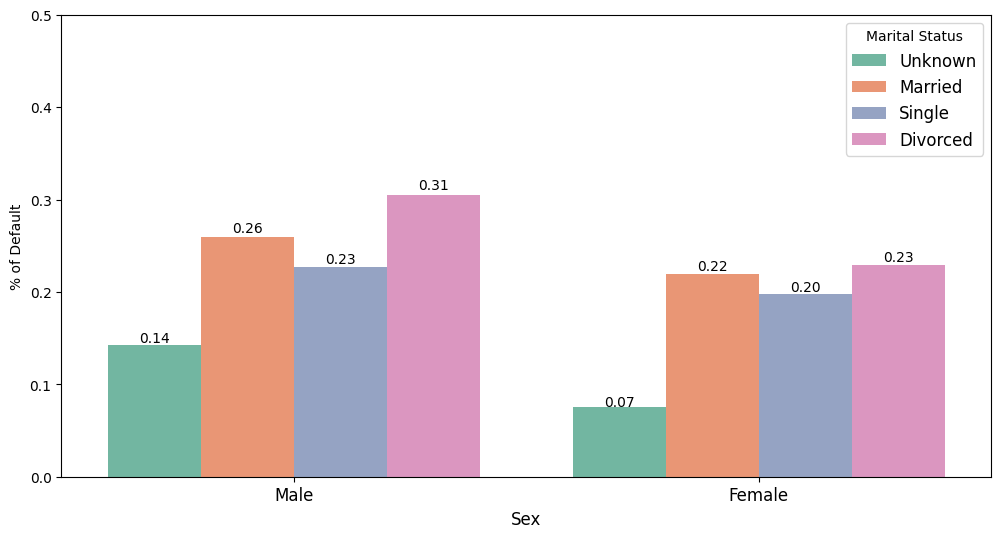

In [25]:

plt.figure(figsize=(12,6))
ax= sns.barplot(x='SEX',y='default',hue='MARRIAGE',data=df,palette='Set2',ci=None)
plt.ylabel('% of Default')
plt.ylim(0,0.5)
plt.xlabel('Sex',fontsize=12)
plt.xticks([0,1],('Male','Female'),fontsize=12)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0.01:  # Only annotate bars with height > 0.01
        ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center')
plt.legend(['Unknown','Married','Single','Divorced'],fontsize=12, title='Marital Status')

In [26]:
df.groupby(by=['EDUCATION', 'SEX'])['default'].value_counts(normalize = True)

EDUCATION  SEX  default
1          1    0          0.791915
                1          0.208085
           2    0          0.818649
                1          0.181351
2          1    0          0.737998
                1          0.262002
           2    0          0.777957
                1          0.222043
3          1    0          0.726131
                1          0.273869
           2    0          0.763580
                1          0.236420
4          1    0          0.904762
                1          0.095238
           2    0          0.962963
                1          0.037037
5          1    0          0.921875
                1          0.078125
           2    0          0.926267
                1          0.073733
Name: proportion, dtype: float64

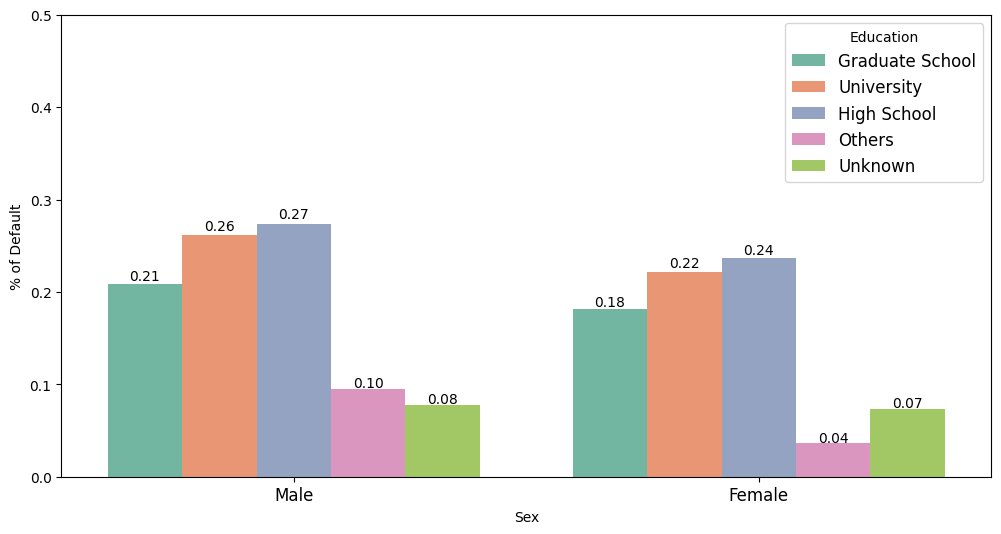

In [27]:
plt.figure(figsize=(12,6))
ax= sns.barplot(data=df,x='SEX',y='default',hue='EDUCATION',palette='Set2',ci=None)
plt.ylabel('% of Default')
plt.xlabel('Sex')
plt.ylim(0,0.5)
plt.xticks([0,1],['Male','Female'],fontsize=12)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0.01:  # Only annotate bars with height > 0.01
        ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center')
plt.legend(['Graduate School','University','High School','Others','Unknown'],fontsize=12, title='Education')


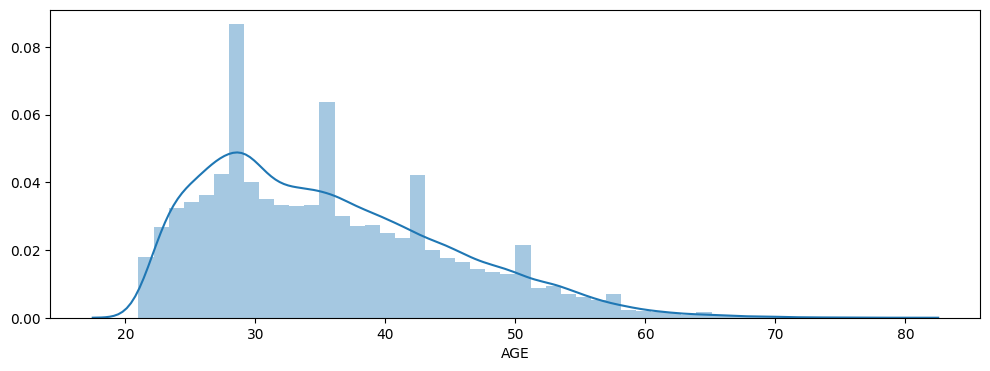

In [28]:
plt.figure(figsize=(12,4))

sns.distplot(df['AGE'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

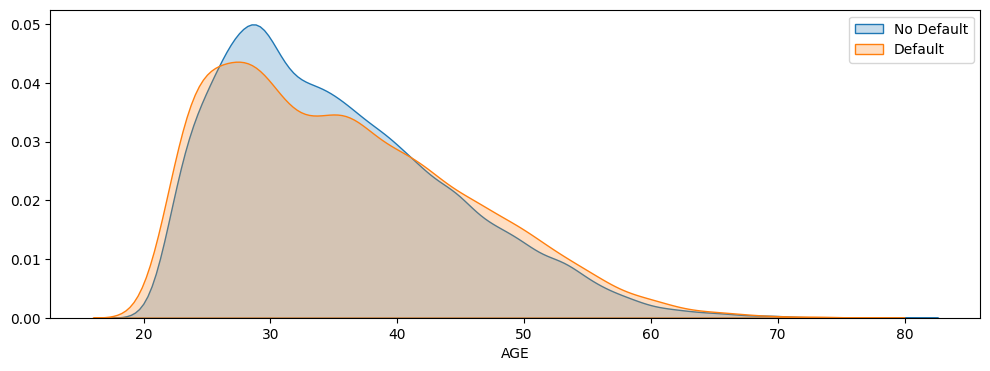

In [29]:
plt.figure(figsize=(12,4))

sns.kdeplot(df.loc[(df['default'] == 0), 'AGE'], label = 'No Default', shade = True)
sns.kdeplot(df.loc[(df['default'] == 1), 'AGE'], label = 'Default', shade = True)
plt.ylabel('')
plt.legend()
plt.show()

In [30]:
df['age_bin'] = pd.cut(df['AGE'], bins=[20,30,40,50,60,70,80])
df['age_bin'].value_counts()

age_bin
(20, 30]    11013
(30, 40]    10713
(40, 50]     6005
(50, 60]     1997
(60, 70]      257
(70, 80]       15
Name: count, dtype: int64

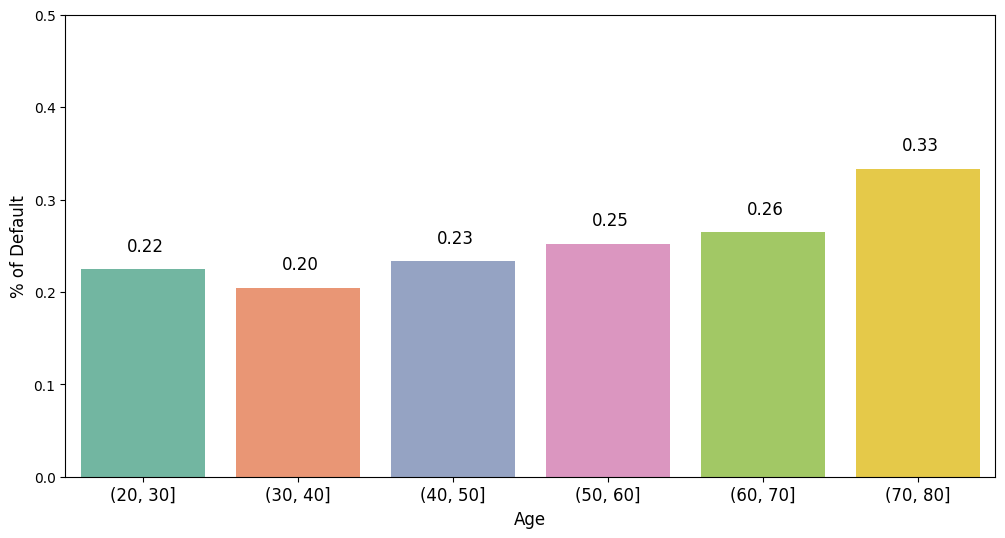

In [31]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df,x='age_bin',y='default',palette='Set2',ci=None)
plt.xlabel("Age", fontsize=12)
plt.ylabel('% of Default', fontsize=12)
plt.ylim(0,0.5)
plt.xticks(fontsize=12)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.02),fontsize=12)
plt.show()


In [32]:
df['default'].groupby(df['age_bin']).value_counts(normalize=True)

age_bin   default
(20, 30]  0          0.775629
          1          0.224371
(30, 40]  0          0.795669
          1          0.204331
(40, 50]  0          0.767027
          1          0.232973
(50, 60]  0          0.747621
          1          0.252379
(60, 70]  0          0.735409
          1          0.264591
(70, 80]  0          0.666667
          1          0.333333
Name: proportion, dtype: float64

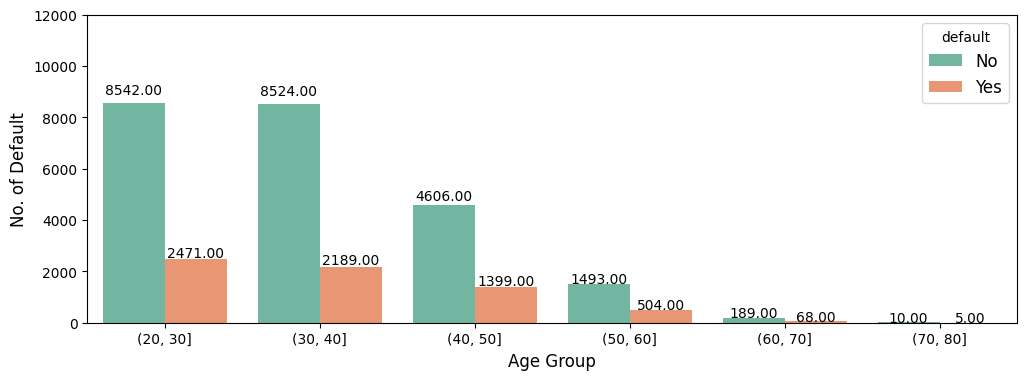

In [33]:
plt.figure(figsize=(12,4))
df['age_bin'] = df['age_bin'].astype(str)
agebin = ['(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]', '(70, 80]']
ax= sns.countplot(x='age_bin',hue='default',data=df,palette='Set2',order=agebin)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("No. of Default", fontsize=12)
plt.ylim(0,12000)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    if height > 0.01:  # Only annotate bars with height > 0.01
        ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.04), ha='center')
plt.legend(['No','Yes'],fontsize=12, title='default')


#### Credit Provided

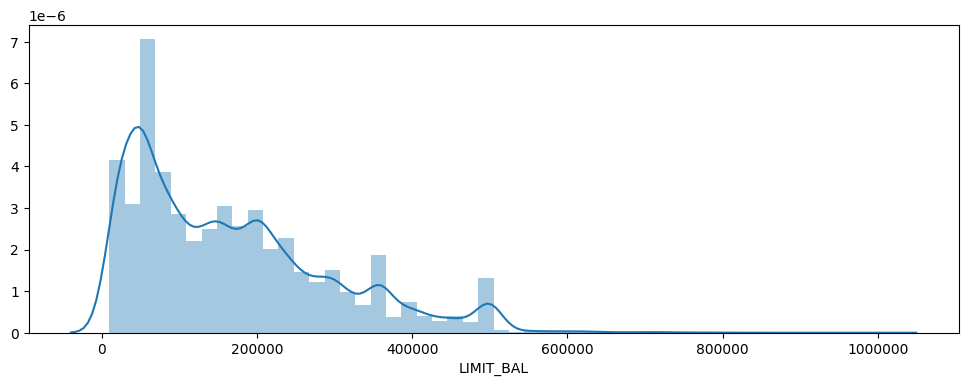

In [34]:
plt.figure(figsize=(12,4))
sns.distplot(df['LIMIT_BAL'])
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.show()

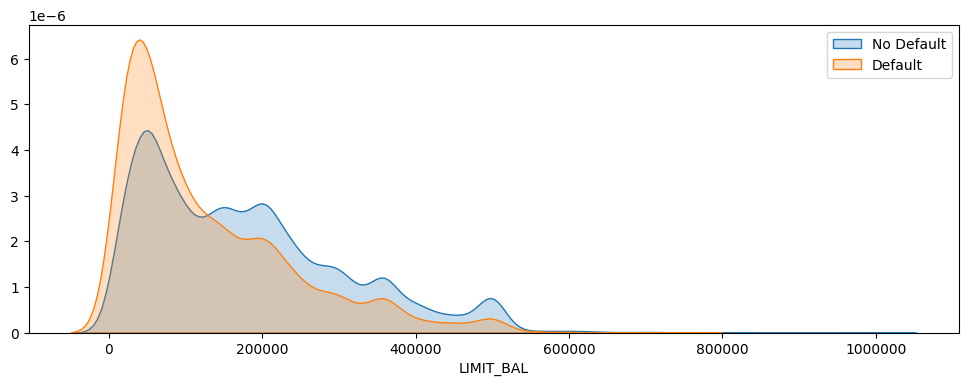

In [35]:
plt.figure(figsize=(12,4))
sns.kdeplot(df.loc[df['default']==0,'LIMIT_BAL'],label='No Default',shade=True)
sns.kdeplot(df.loc[df['default']==1,'LIMIT_BAL'],label='Default',shade=True)
plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x
plt.ylabel('')
plt.legend()
plt.show()

In [36]:
df['Limitbin']=pd.cut(df['LIMIT_BAL'],[5000,50000,100000,150000,200000,300000,400000,500000,1000000])
df['Limitbin'].value_counts()

Limitbin
(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1000000]     206
Name: count, dtype: int64

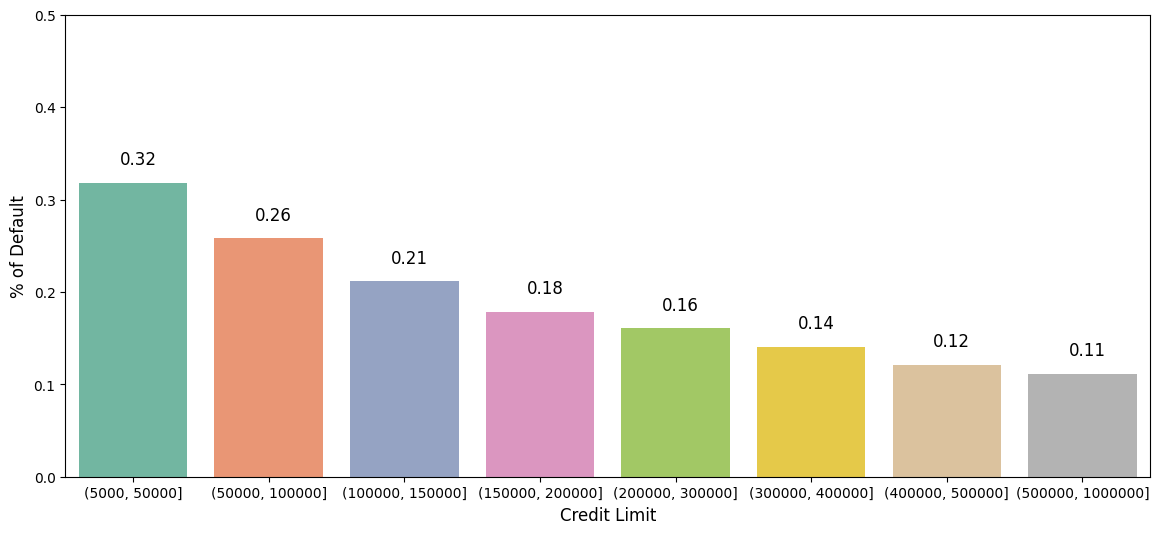

In [37]:
plt.figure(figsize=(14,6))
ax=sns.barplot(data=df,x='Limitbin',y='default',palette='Set2',ci=None)
plt.xlabel("Credit Limit", fontsize=12)
plt.ylabel("% of Default", fontsize=12) 
plt.ylim(0,0.5)
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.30, p.get_height()+0.02),fontsize=12)


#### Amount of given credit + demographic features

In [38]:
df.groupby('SEX')['LIMIT_BAL'].mean()

SEX
1    163519.825034
2    170086.462014
Name: LIMIT_BAL, dtype: float64

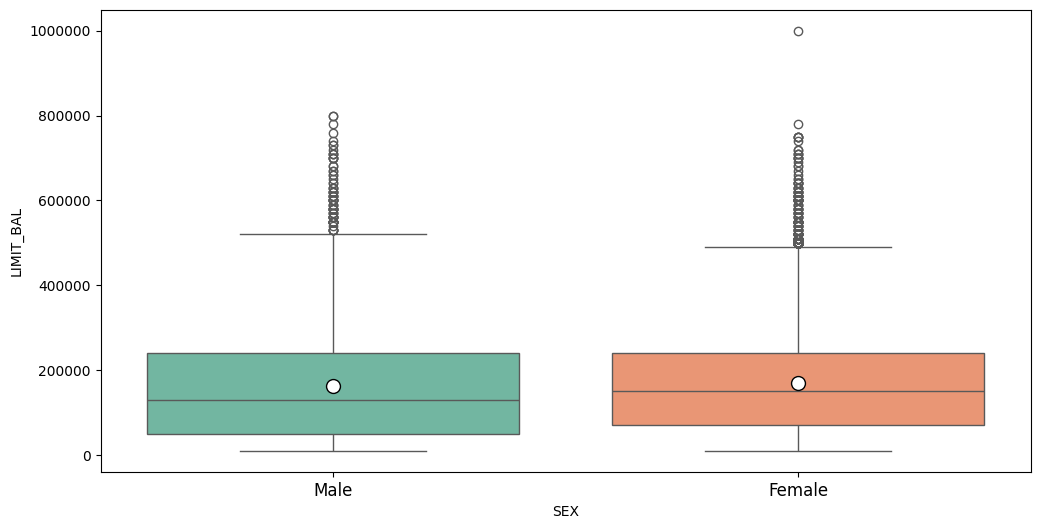

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='SEX',y='LIMIT_BAL',data=df,palette='Set2',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation on y
plt.xticks([0,1],['Male','Female'],fontsize=12)
plt.show()

In [40]:
df.groupby('EDUCATION')['LIMIT_BAL'].mean()

EDUCATION
1    212956.069910
2    147062.437634
3    126550.270490
4    220894.308943
5    167205.797101
Name: LIMIT_BAL, dtype: float64

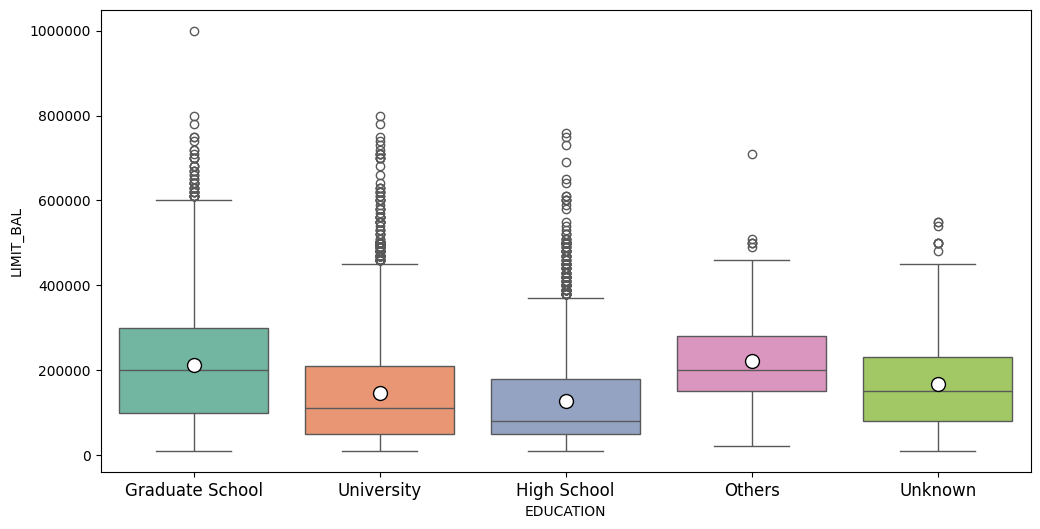

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(x='EDUCATION',y='LIMIT_BAL',data=df,palette='Set2',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation on y
plt.xticks([0,1,2,3,4],['Graduate School','University','High School','Others','Unknown'],fontsize=12)
plt.show()

In [42]:
df.groupby('MARRIAGE')['LIMIT_BAL'].mean()

MARRIAGE
0    132962.962963
1    182200.893184
2    156413.660737
3     98080.495356
Name: LIMIT_BAL, dtype: float64

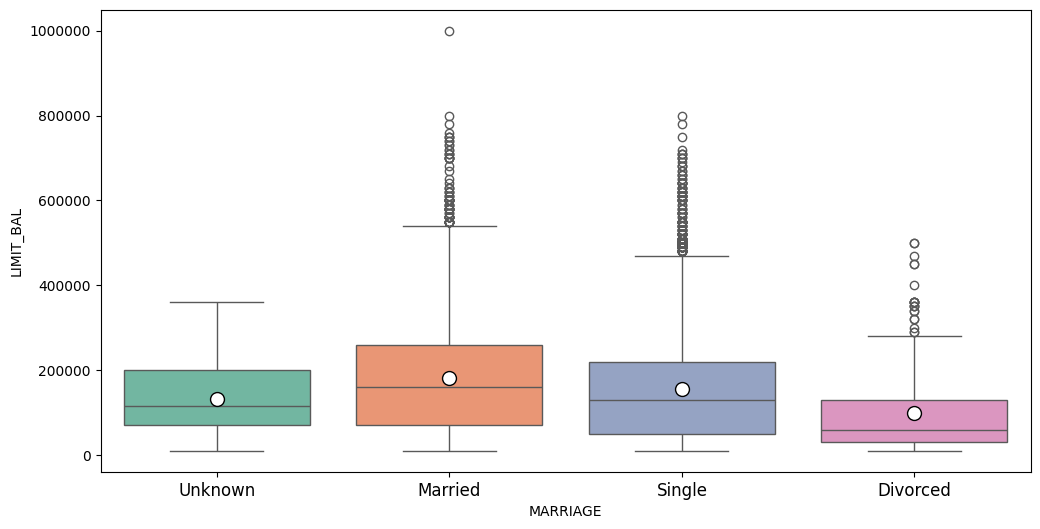

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x='MARRIAGE',y='LIMIT_BAL',data=df,palette='Set2',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation on y
plt.xticks([0,1,2,3],['Unknown','Married','Single','Divorced'],fontsize=12)
plt.show()

In [44]:
df.groupby('age_bin')['LIMIT_BAL'].mean()

age_bin
(20, 30]    132490.692818
(30, 40]    197271.539251
(40, 50]    179680.213156
(50, 60]    159349.023535
(60, 70]    200194.552529
(70, 80]    226000.000000
Name: LIMIT_BAL, dtype: float64

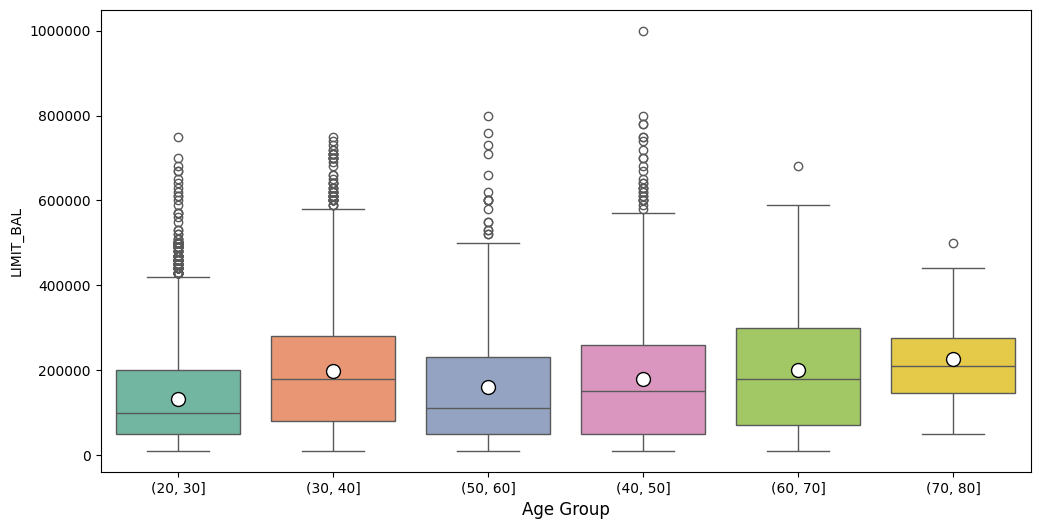

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(x='age_bin',y='LIMIT_BAL',data=df,palette='Set2',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation on y
plt.xlabel("Age Group", fontsize=12)
plt.show()

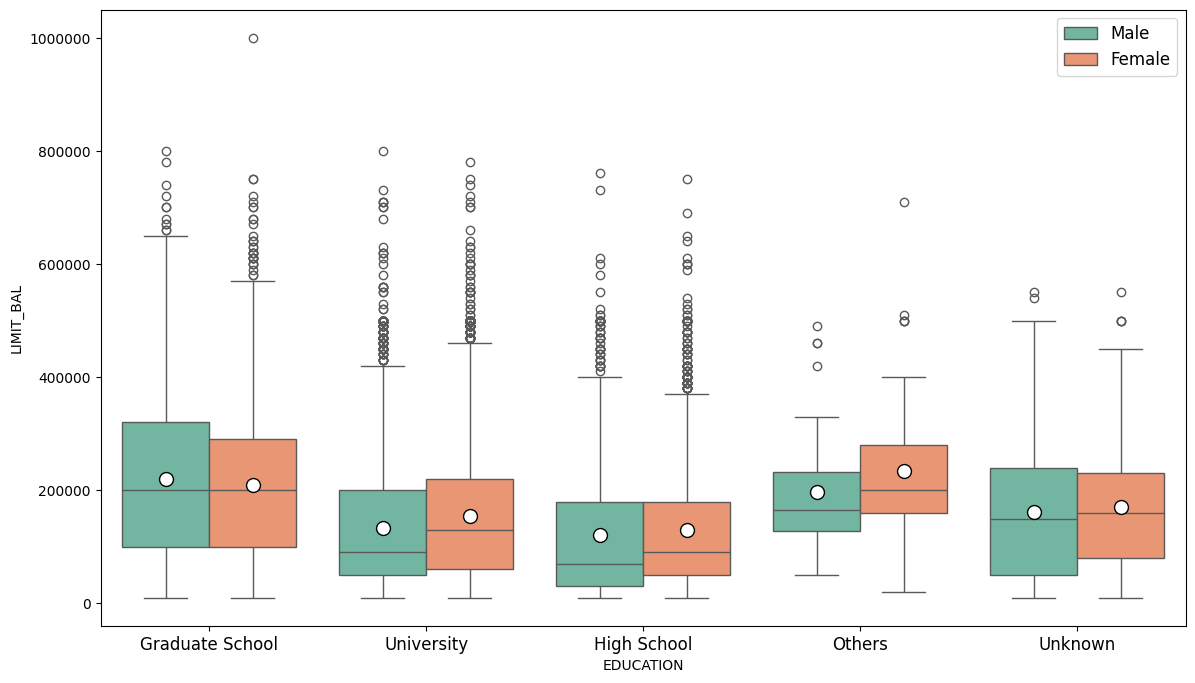

In [46]:
plt.figure(figsize=(14,8))
sns.boxplot(x='EDUCATION',y='LIMIT_BAL',hue='SEX',data=df,palette='Set2',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation on y
plt.xticks([0,1,2,3,4],['Graduate School','University','High School','Others','Unknown'],fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Male', 'Female']
plt.legend(handles, new_labels, fontsize=12)
plt.show()

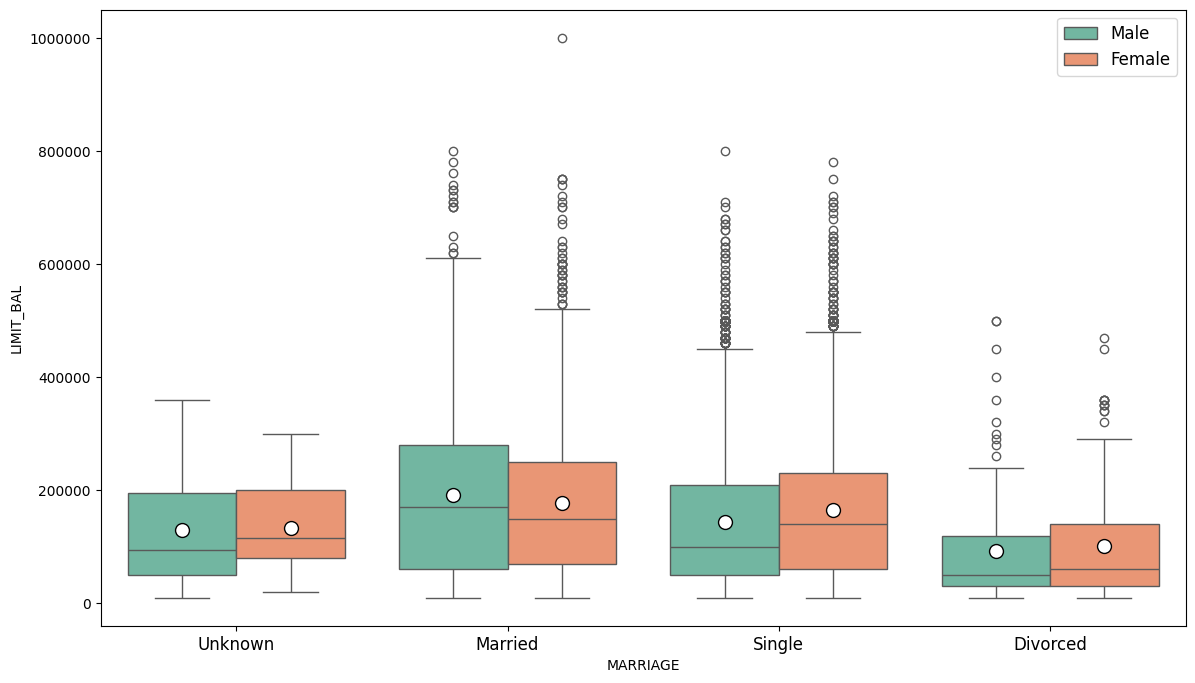

In [47]:
plt.figure(figsize=(14,8))
sns.boxplot(x='MARRIAGE',y='LIMIT_BAL',hue='SEX',data=df,palette='Set2',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation on y
plt.xticks([0,1,2,3],['Unknown','Married','Single','Divorced'],fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Male','Female']
plt.legend(handles, new_labels, fontsize=12)
plt.show()

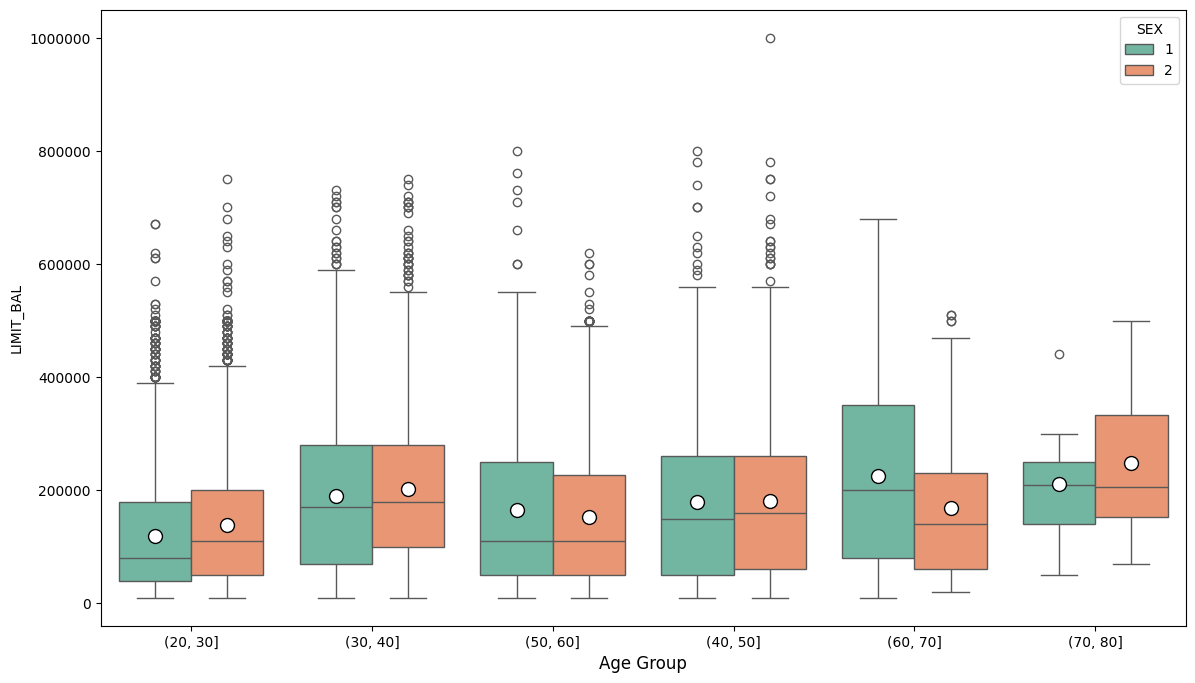

In [48]:
plt.figure(figsize=(14,8))
sns.boxplot(x='age_bin',y='LIMIT_BAL',hue='SEX',data=df,palette='Set2',showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ticklabel_format(style='plain', axis='y') #repressing scientific notation on y
plt.xlabel("Age Group", fontsize=12)    
plt.show()

#### Repayment Status

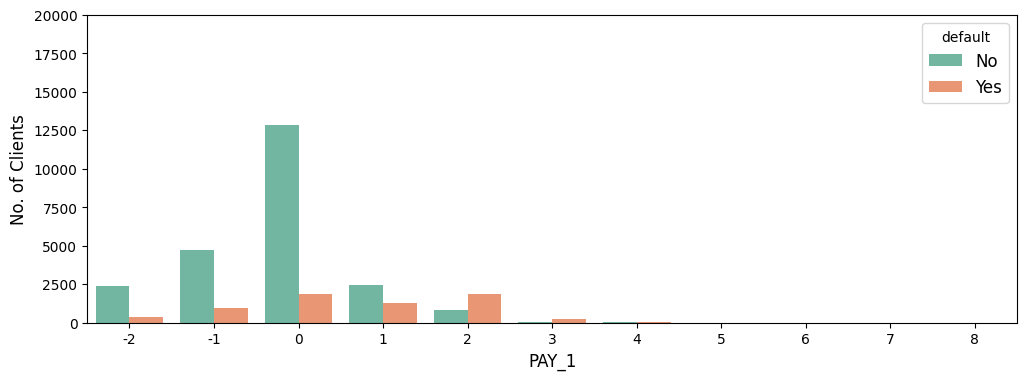

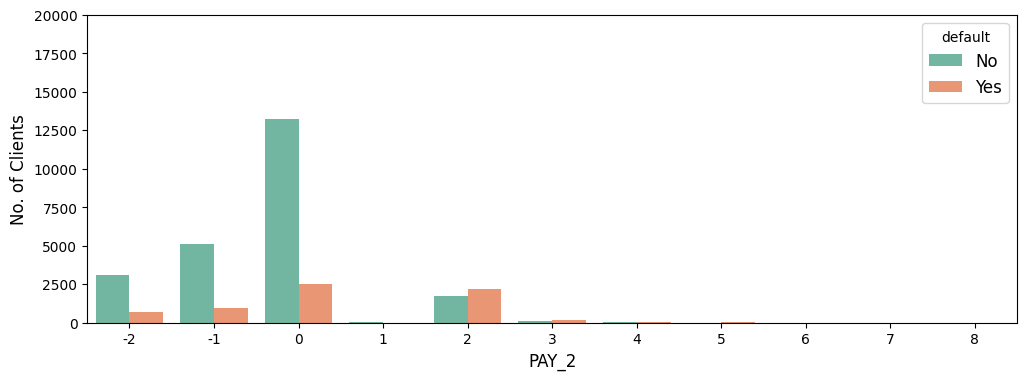

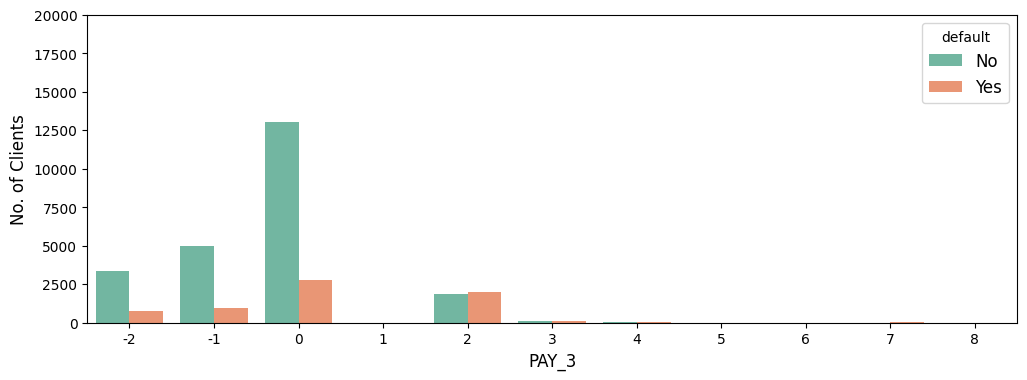

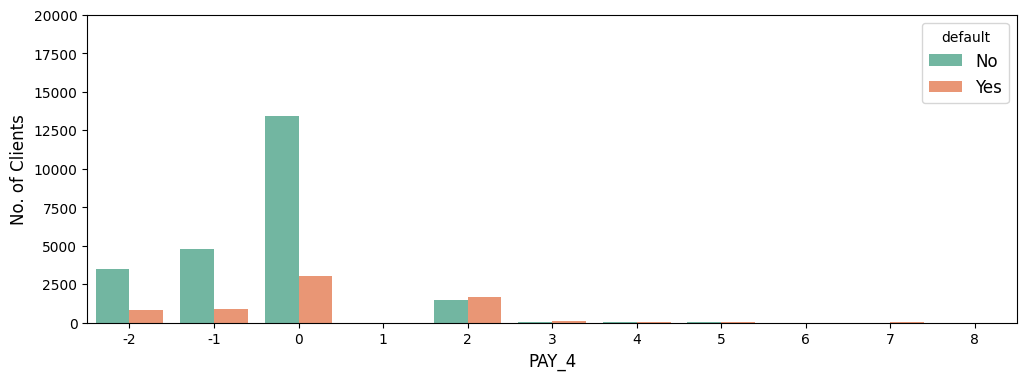

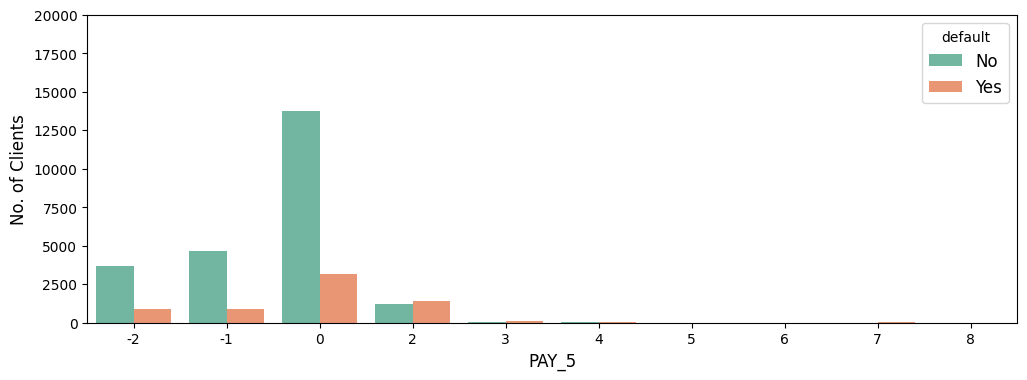

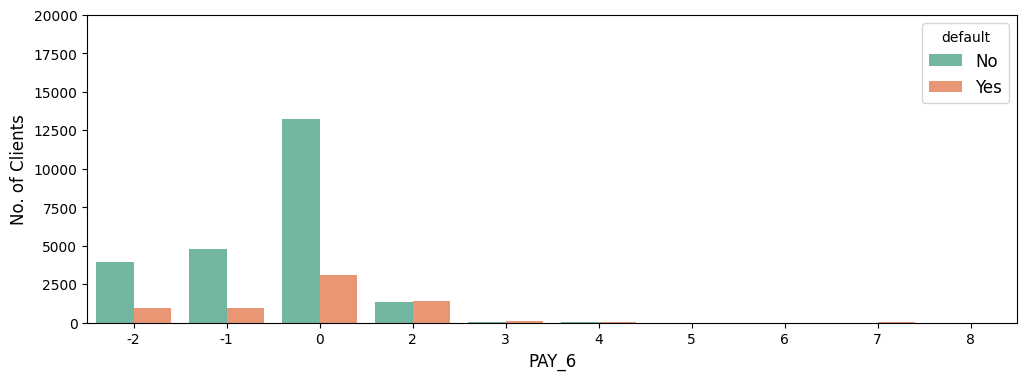

In [49]:
pay_variables = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for i , cpl in enumerate(pay_variables):
    plt.figure(figsize=(12,4))
    ax=sns.countplot(x=cpl,data=df,hue='default',palette='Set2')
    plt.xlabel(cpl,fontsize=12)
    plt.ylabel('No. of Clients',fontsize=12)
    plt.ylim(0,20000)
    plt.legend(['No','Yes'],fontsize=12, title='default')
    # for p in ax.patches:
    #     width = p.get_width()
    #     height = p.get_height()
    #     x, y = p.get_xy() 
    #     if height > 0.01:  # Only annotate bars with height > 0.01
            # ax.annotate(f'{height:.2f}', (x + width/2, y + height*1.02), ha='center')
    plt.show()

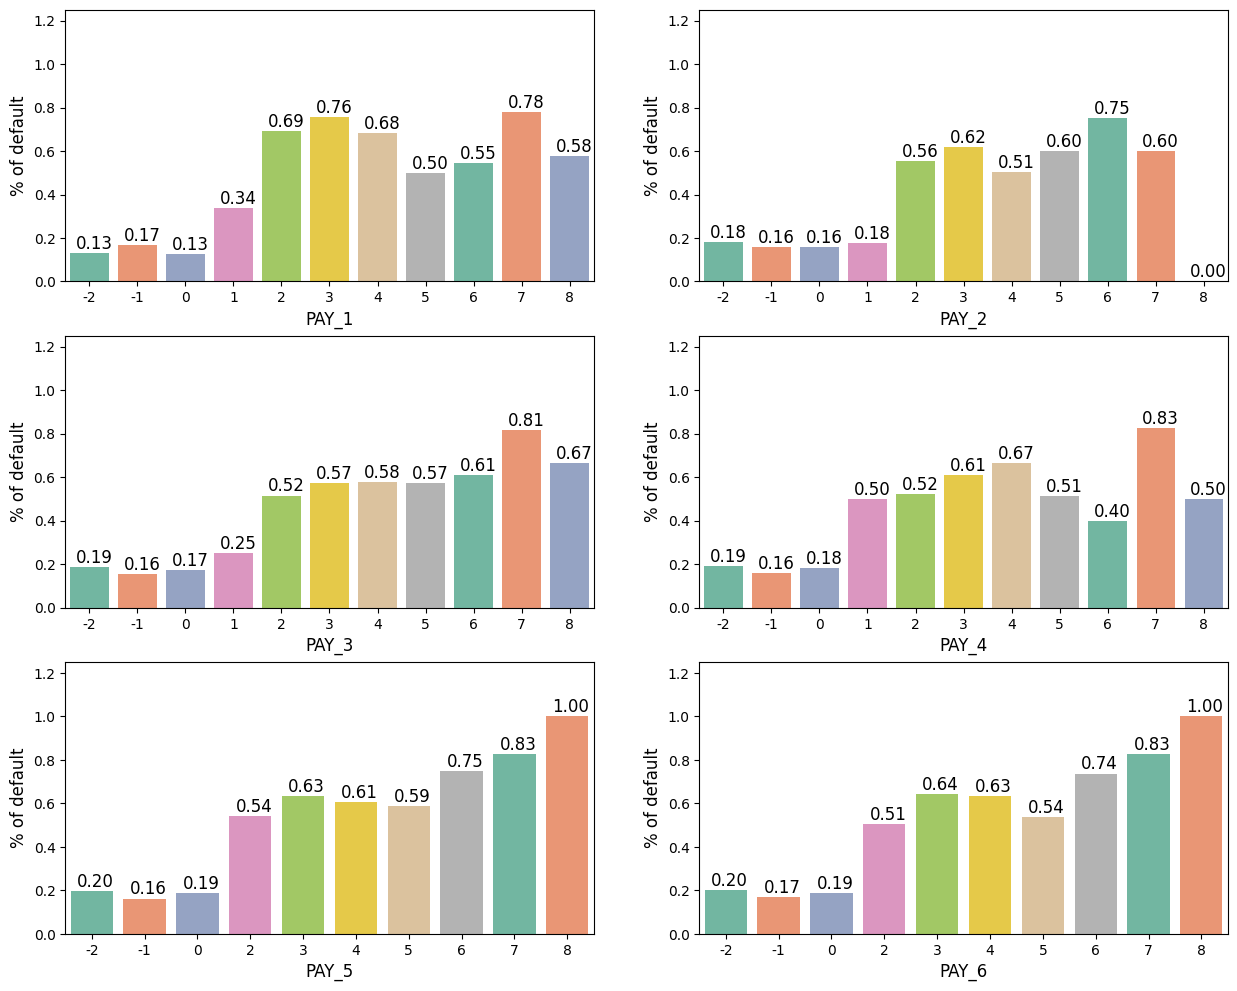

In [50]:
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_variables):
    plt.subplot(3,2,i+1)
    ax =sns.barplot(x=col,data=df,y='default',palette='Set2',ci=None)
    plt.xlabel(col,fontsize=12)
    plt.ylabel('% of default',fontsize=12)  
    plt.ylim(0,1.25)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.12, p.get_height()+0.02),fontsize=12)

    

In [51]:
df['pay1new'] = df['PAY_1'].copy()
df['pay2new'] = df['PAY_2'].copy()
df['pay3new'] = df['PAY_3'].copy()
df['pay4new'] = df['PAY_4'].copy()
df['pay5new'] = df['PAY_5'].copy()
df['pay6new'] = df['PAY_6'].copy()


In [52]:
payxnew = ['pay1new','pay2new','pay3new','pay4new','pay5new','pay6new']
for col in payxnew:
    df.loc[:,col] = df.loc[:,col].replace(5,4)
    df.loc[:,col] = df.loc[:,col].replace(6,4)
    df.loc[:,col] = df.loc[:,col].replace(7,4)
    df.loc[:,col] = df.loc[:,col].replace(8,4)

In [53]:
payxnew

['pay1new', 'pay2new', 'pay3new', 'pay4new', 'pay5new', 'pay6new']

In [54]:
df['pay1new'].value_counts()

pay1new
 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4      141
Name: count, dtype: int64

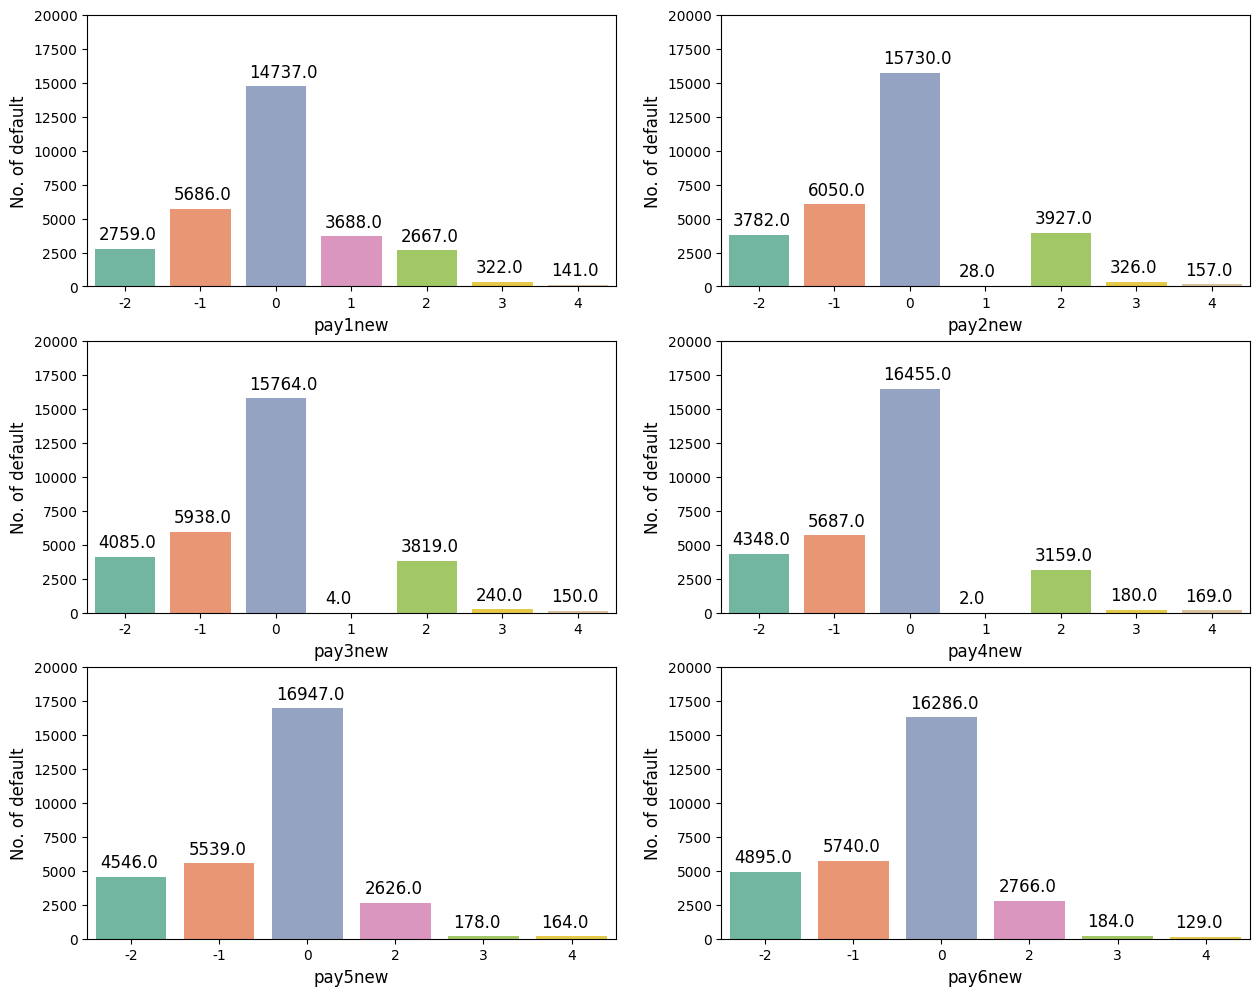

In [55]:
plt.figure(figsize=(15,12))
for i,col in enumerate(payxnew):
    plt.subplot(3,2,i+1)
    ax =sns.countplot(x=col,data=df,palette='Set2')
    plt.xlabel(col,fontsize=12)
    plt.ylabel('No. of default',fontsize=12)  
    plt.ylim(0,20000)

    for p in ax.patches:
        ax.annotate("%.1f" %(p.get_height()), (p.get_x()+0.05, p.get_height()+700),fontsize=12)

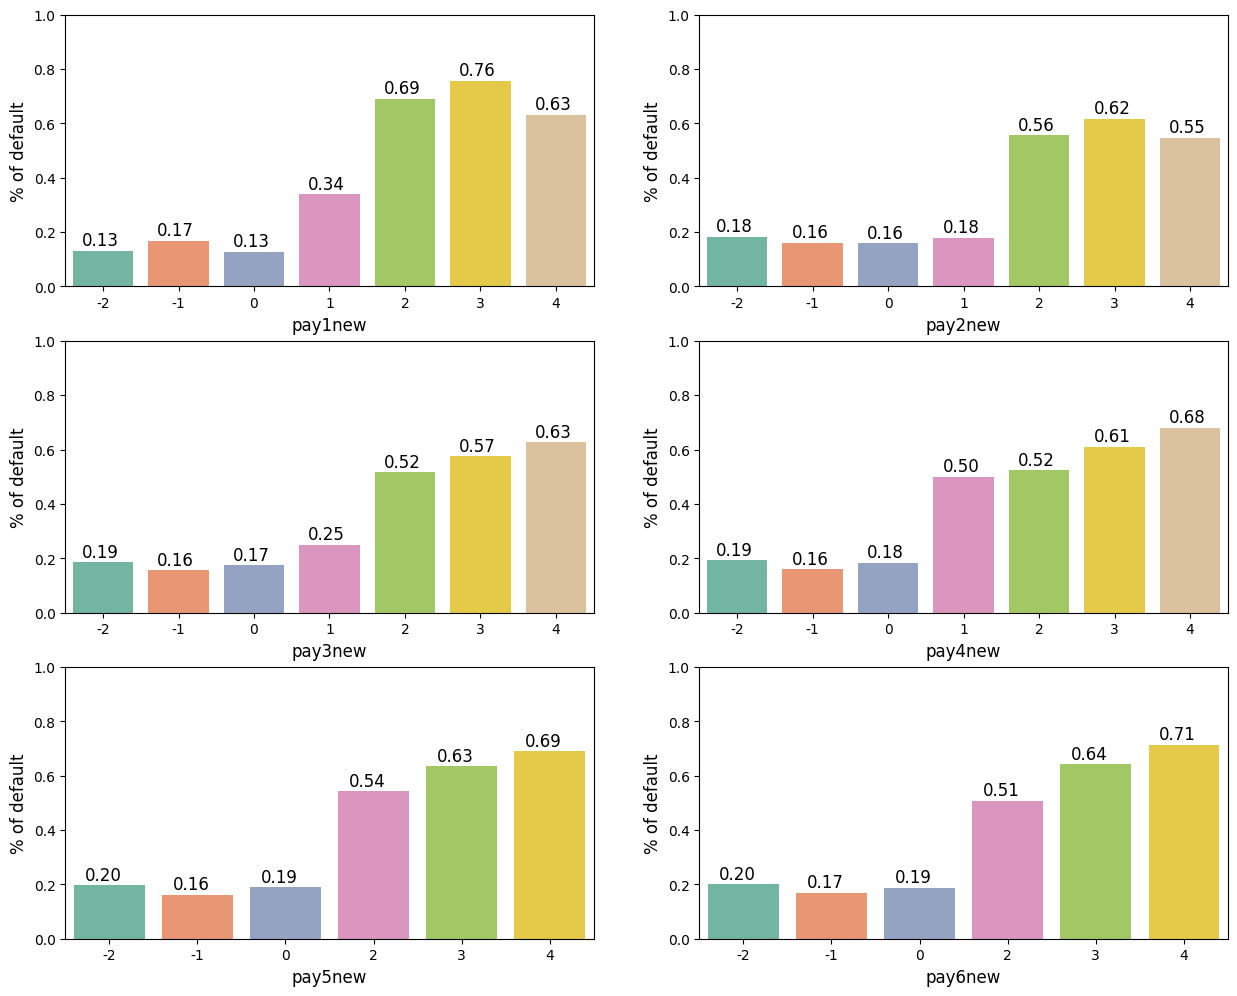

In [56]:
plt.figure(figsize=(15,12))
for i,col in enumerate(payxnew):
    plt.subplot(3,2,i+1)
    ax =sns.barplot(x=col,data=df,y='default',palette='Set2',ci=None)
    plt.xlabel(col,fontsize=12)
    plt.ylabel('% of default',fontsize=12)  
    plt.ylim(0,1)

    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.12, p.get_height()+0.02),fontsize=12)

#### Bill Statement and Previous Payments

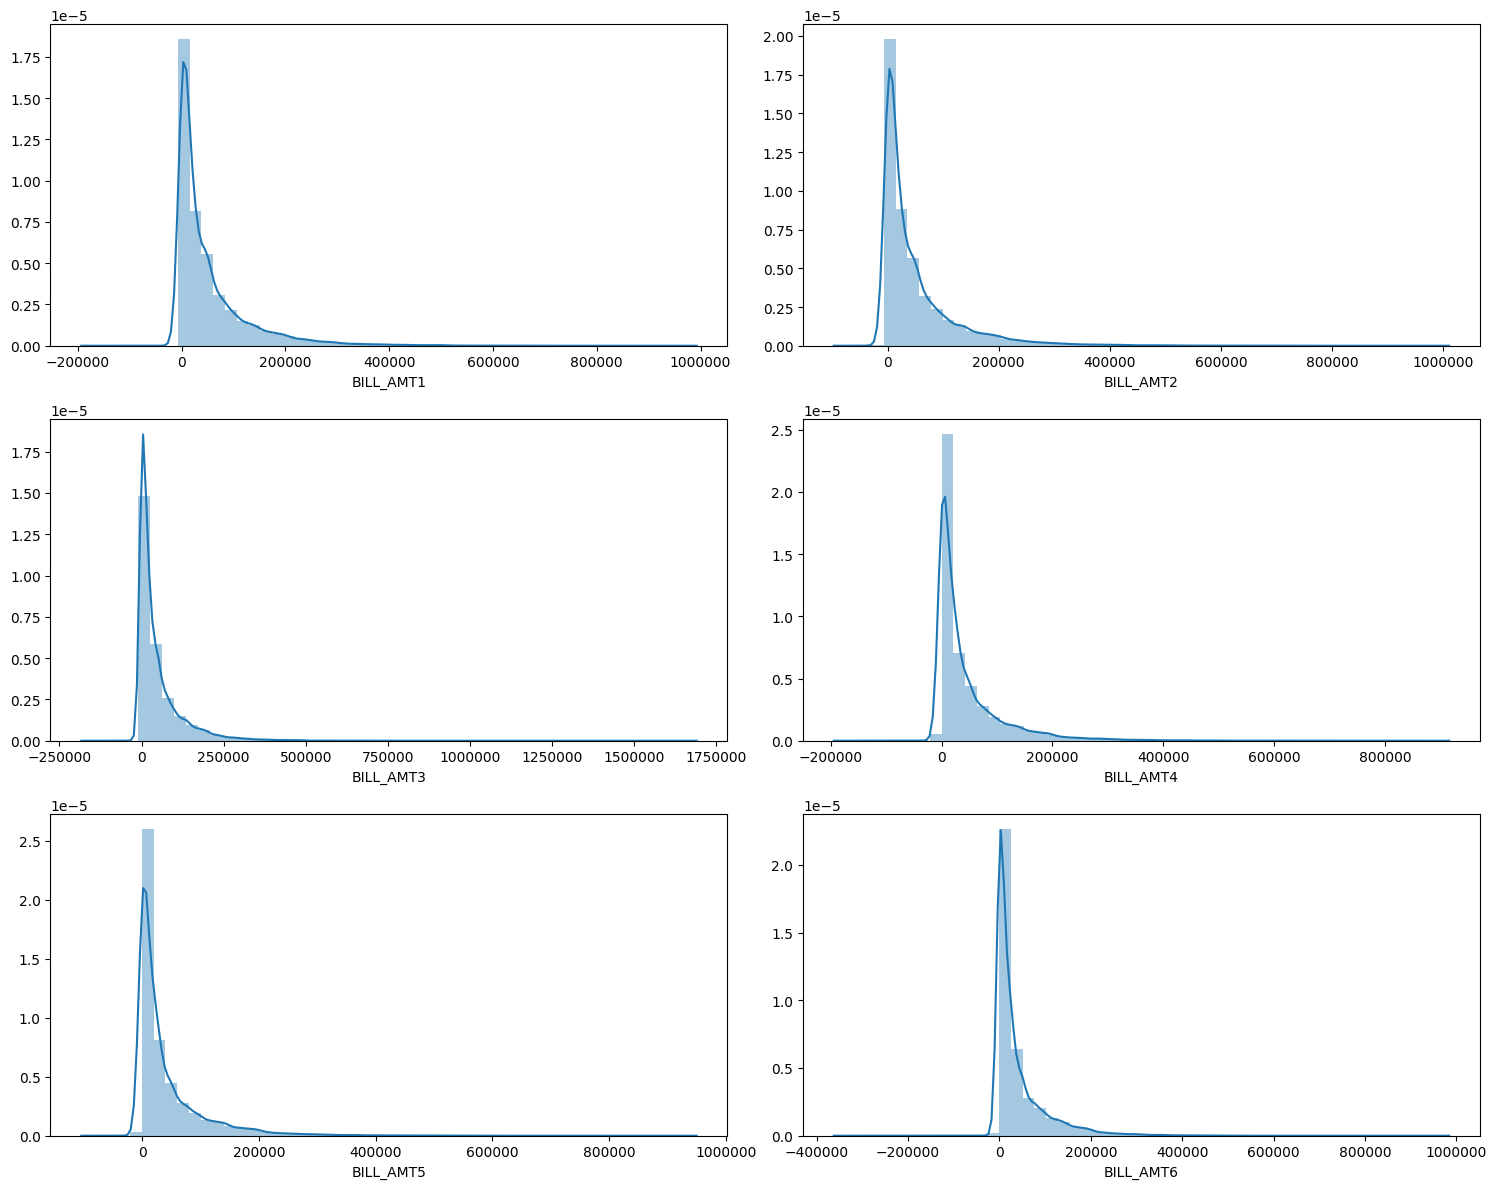

In [57]:
bill_amount_features = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
plt.figure(figsize=(15,12))
for i,col in enumerate(bill_amount_features):
    plt.subplot(3,2,i+1)
    sns.distplot(df.loc[:,col])
    
    plt.ylabel('')
    plt.tight_layout()
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x

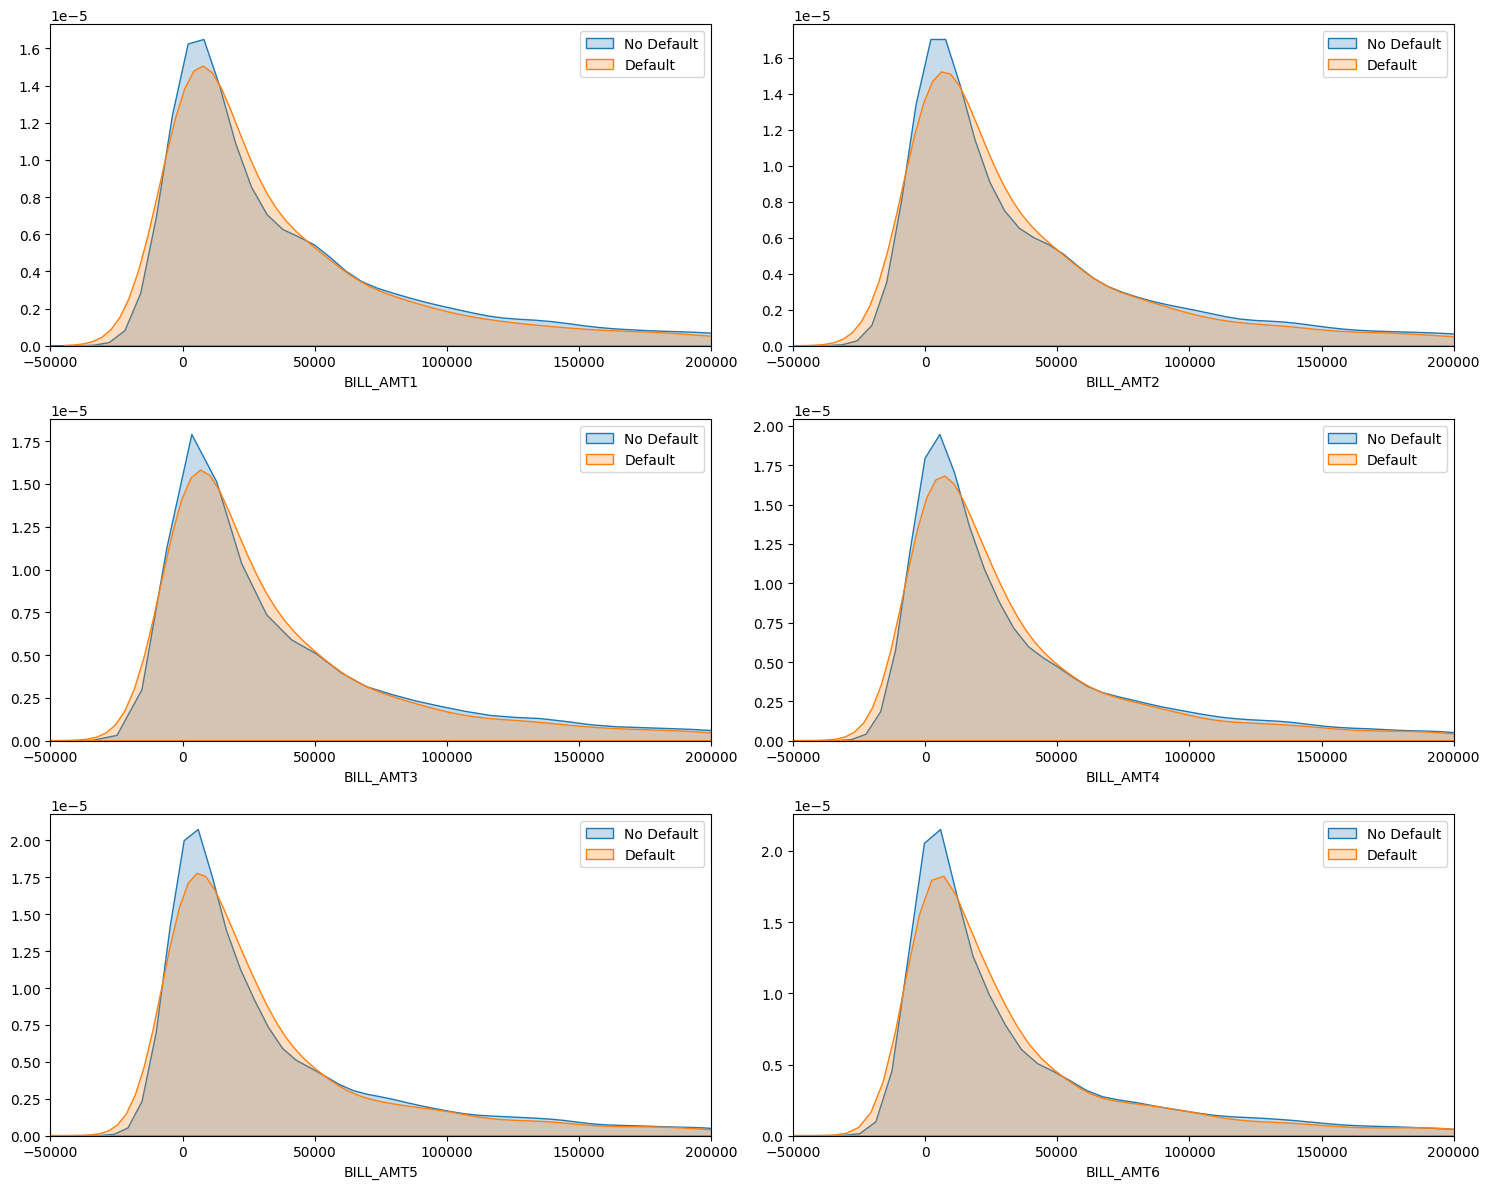

In [58]:
plt.figure(figsize=(15,12))
for i,col in enumerate(bill_amount_features):
    plt.subplot(3,2,i+1)
    sns.kdeplot(df.loc[df['default']==0,col],label='No Default',shade=True)
    sns.kdeplot(df.loc[df['default']==1,col],label='Default',shade=True)
    plt.ylabel('')
    plt.xlim(-50000,200000)
    plt.legend()
    plt.tight_layout()
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x

#### Amount of Previous Payments


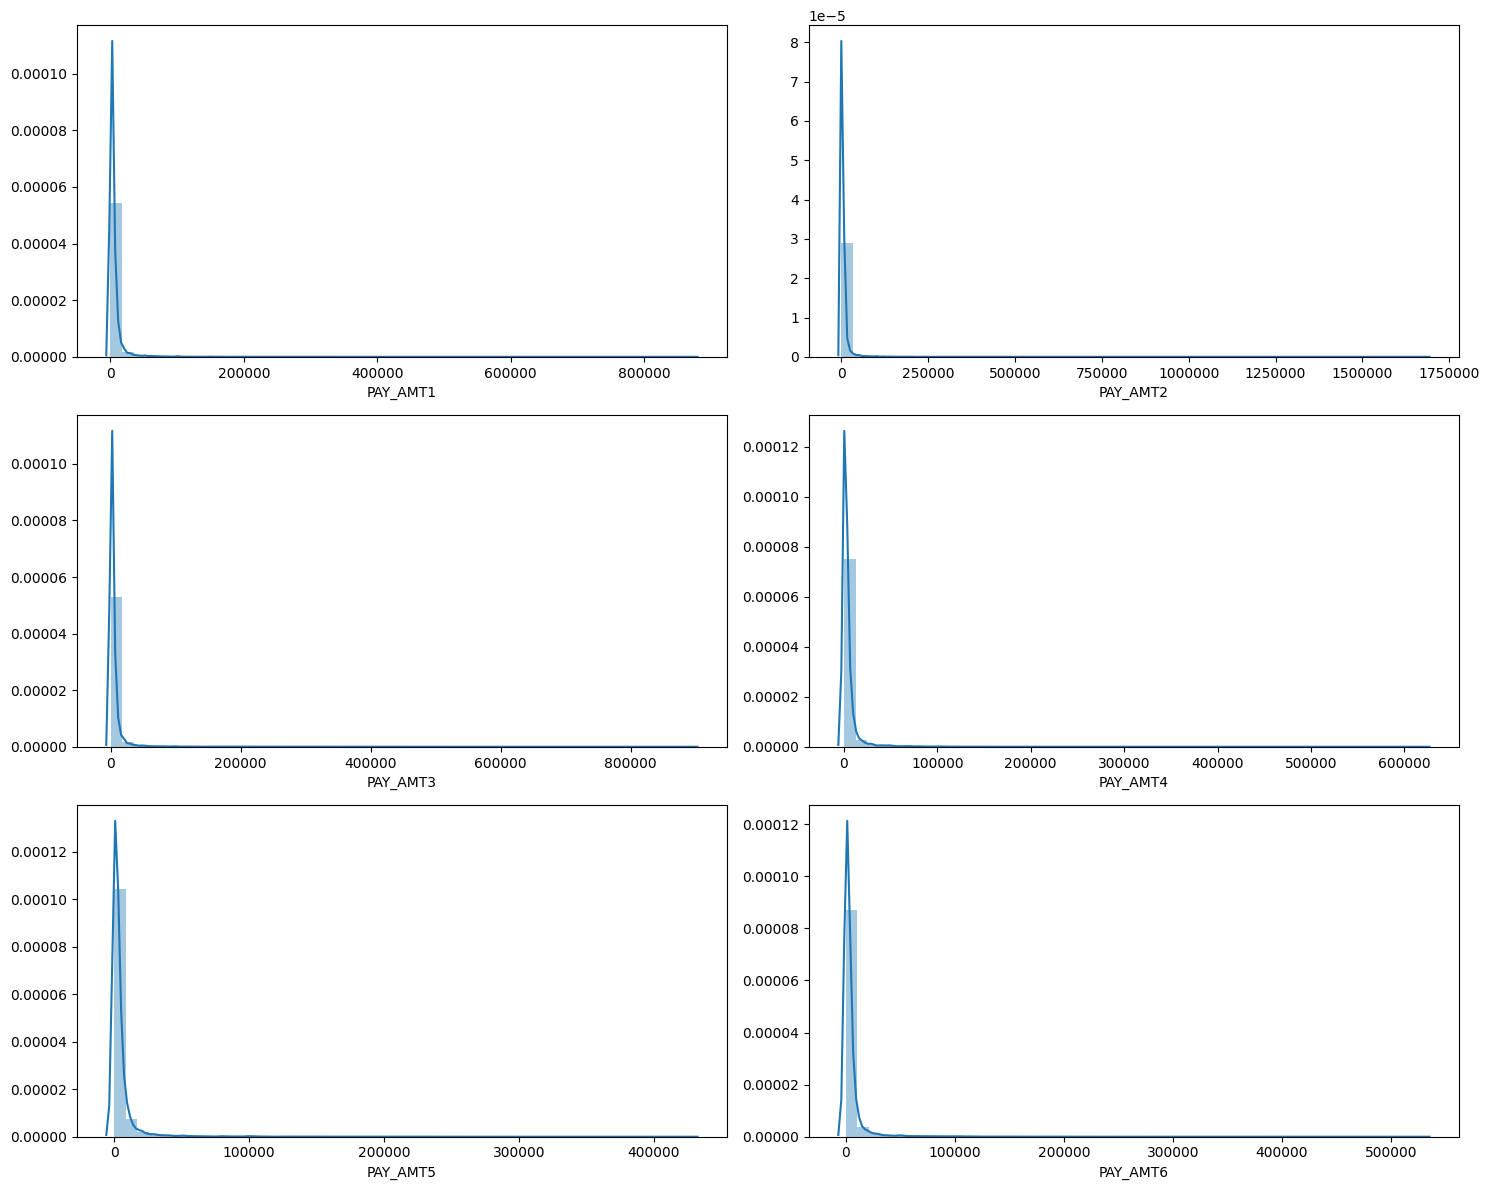

In [59]:
pay_amount_features = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_amount_features):
    plt.subplot(3,2,i+1)
    sns.distplot(df.loc[:,col])
    plt.ylabel('')
    plt.tight_layout()
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x

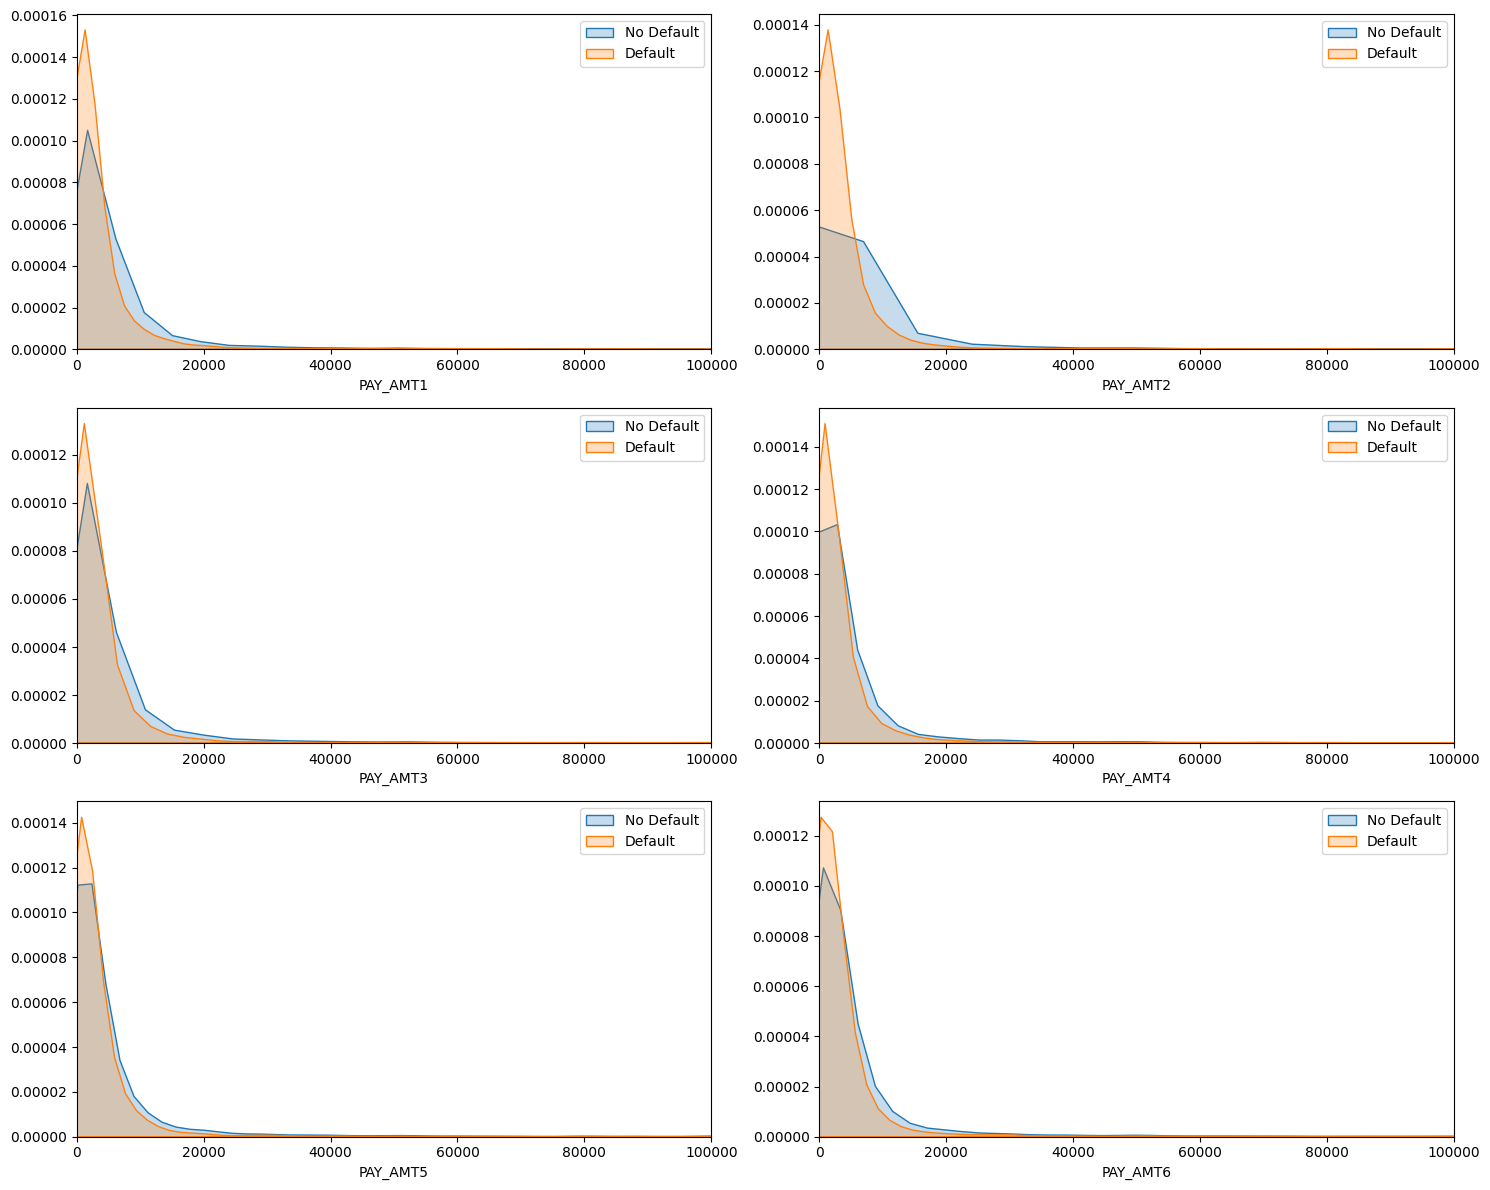

In [60]:
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_amount_features):
    plt.subplot(3,2,i+1)
    sns.kdeplot(df.loc[df['default']==0,col],label='No Default',shade=True)
    sns.kdeplot(df.loc[df['default']==1,col],label='Default',shade=True)
    plt.ylabel('')
    plt.xlim(0,100000)
    plt.legend()
    plt.tight_layout()
    plt.ticklabel_format(style='plain', axis='x') #repressing scientific notation on x

In [61]:
df['Pay_amt_bin1'] = df['PAY_AMT1'].copy()
df['Pay_amt_bin2'] = df['PAY_AMT2'].copy()
df['Pay_amt_bin3'] = df['PAY_AMT3'].copy()
df['Pay_amt_bin4'] = df['PAY_AMT4'].copy()
df['Pay_amt_bin5'] = df['PAY_AMT5'].copy()
df['Pay_amt_bin6'] = df['PAY_AMT6'].copy()

In [66]:
pay_amt_bins = ['Pay_amt_bin1','Pay_amt_bin2','Pay_amt_bin3','Pay_amt_bin4','Pay_amt_bin5','Pay_amt_bin6']

for i,col in enumerate(pay_amt_bins):
    df[col] = pd.cut(df[pay_amount_features[i]],bins=[-1,0,25000,50000,100000,2000000])
    print(df[col].value_counts())

Pay_amt_bin1
(0, 25000]           23730
(-1, 0]               5249
(25000, 50000]         550
(50000, 100000]        322
(100000, 2000000]      149
Name: count, dtype: int64
Pay_amt_bin2
(0, 25000]           23569
(-1, 0]               5396
(25000, 50000]         556
(50000, 100000]        283
(100000, 2000000]      196
Name: count, dtype: int64
Pay_amt_bin3
(0, 25000]           23068
(-1, 0]               5968
(25000, 50000]         514
(50000, 100000]        273
(100000, 2000000]      177
Name: count, dtype: int64
Pay_amt_bin4
(0, 25000]           22641
(-1, 0]               6408
(25000, 50000]         533
(50000, 100000]        271
(100000, 2000000]      147
Name: count, dtype: int64
Pay_amt_bin5
(0, 25000]           22382
(-1, 0]               6703
(25000, 50000]         493
(50000, 100000]        268
(100000, 2000000]      154
Name: count, dtype: int64
Pay_amt_bin6
(0, 25000]           21785
(-1, 0]               7173
(25000, 50000]         517
(50000, 100000]        300
(100000, 

In [67]:
for col in pay_amt_bins:
    print(df['default'].groupby(df[col]).value_counts(normalize=True))

Pay_amt_bin1       default
(-1, 0]            0          0.640503
                   1          0.359497
(0, 25000]         0          0.803582
                   1          0.196418
(25000, 50000]     0          0.910909
                   1          0.089091
(50000, 100000]    0          0.919255
                   1          0.080745
(100000, 2000000]  0          0.912752
                   1          0.087248
Name: proportion, dtype: float64
Pay_amt_bin2       default
(-1, 0]            0          0.666605
                   1          0.333395
(0, 25000]         0          0.797997
                   1          0.202003
(25000, 50000]     0          0.926259
                   1          0.073741
(50000, 100000]    0          0.936396
                   1          0.063604
(100000, 2000000]  0          0.913265
                   1          0.086735
Name: proportion, dtype: float64
Pay_amt_bin3       default
(-1, 0]            0          0.676441
                   1          0.32

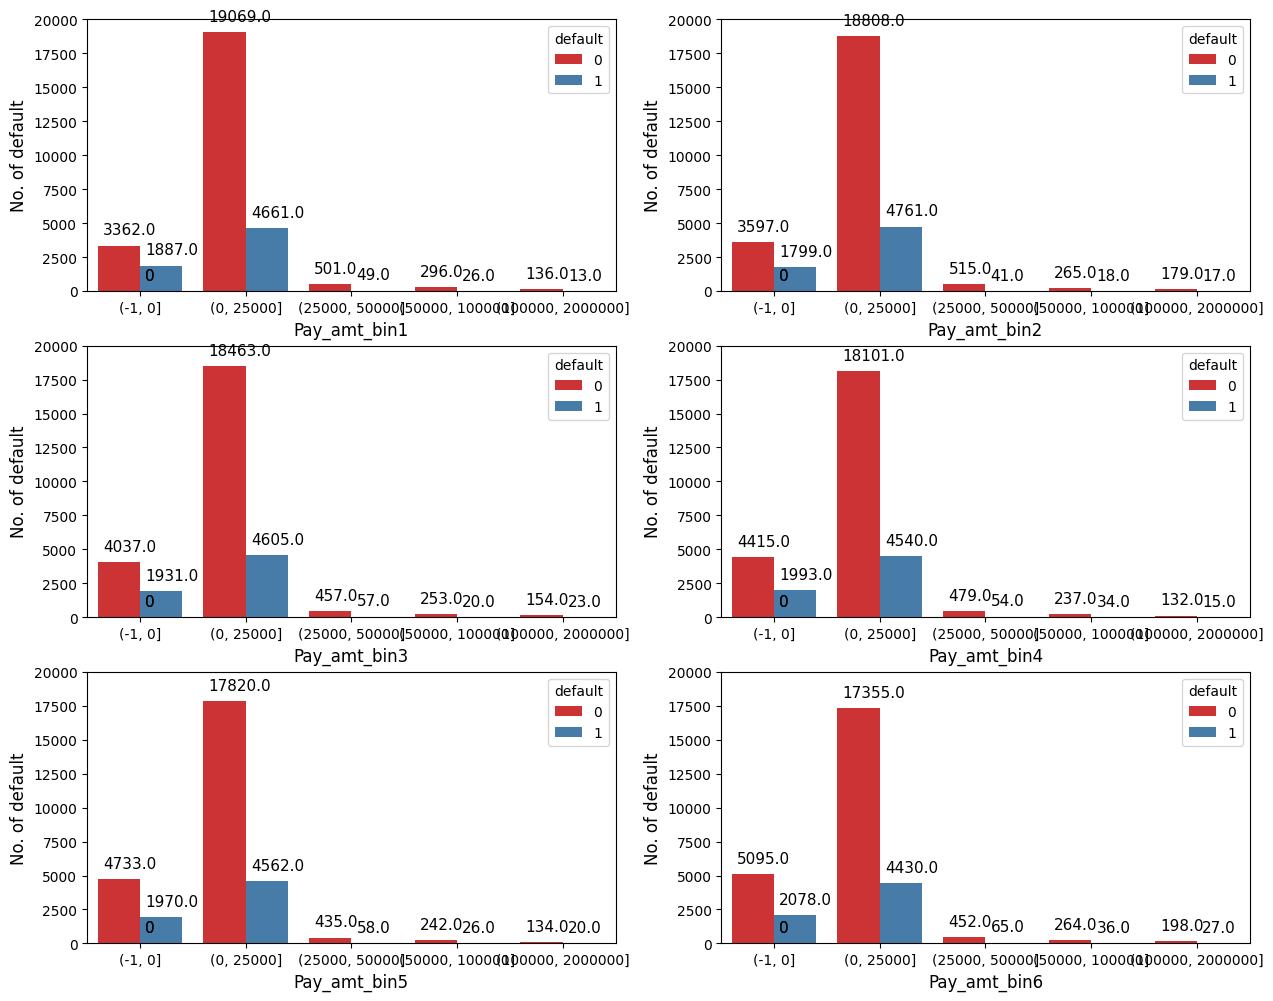

In [73]:
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_amt_bins):
    plt.subplot(3,2,i+1)
    ax =sns.countplot(x=col,data=df,hue='default',palette='Set1')
    plt.xlabel(col,fontsize=12)
    plt.ylabel('No. of default',fontsize=12) 
    plt.ylim(0,20000) 
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.05, p.get_height()+800), fontsize=11)
    



    

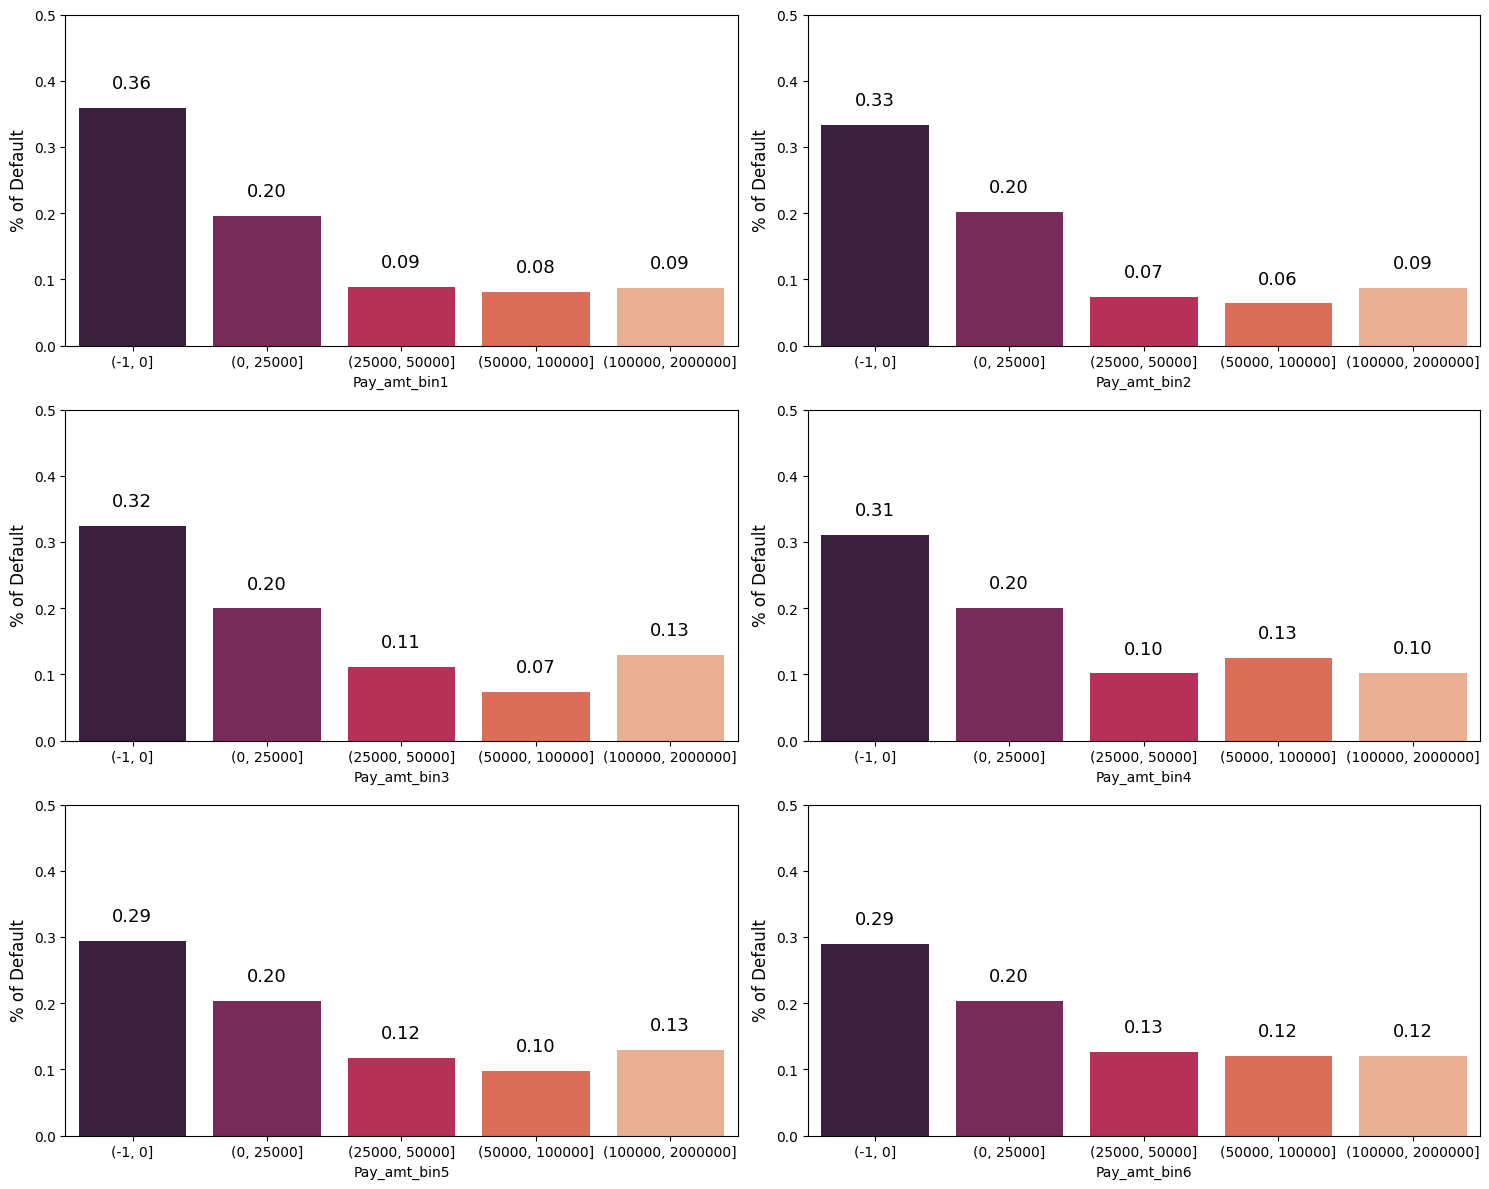

In [75]:
plt.figure(figsize=(15,12))
for i,col in enumerate(pay_amt_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default", data = df, palette = 'rocket', ci = None)
    plt.ylabel("% of Default", fontsize= 12)
    plt.ylim(0,0.5)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

### Pie chart for the distribution of target variable in data

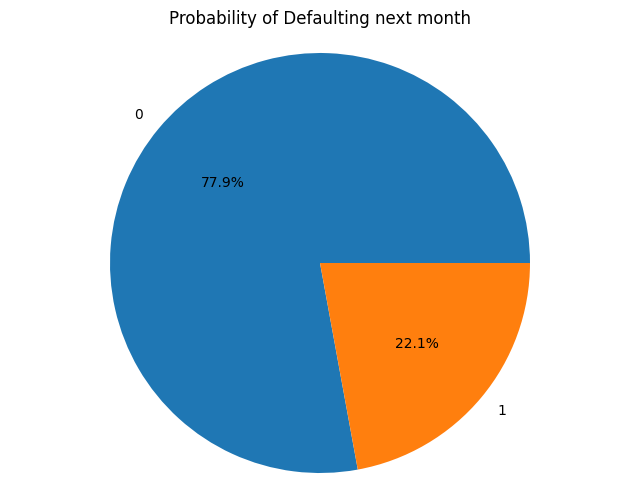

In [62]:

target_counts = df['default'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Probability of Defaulting next month')
plt.show()


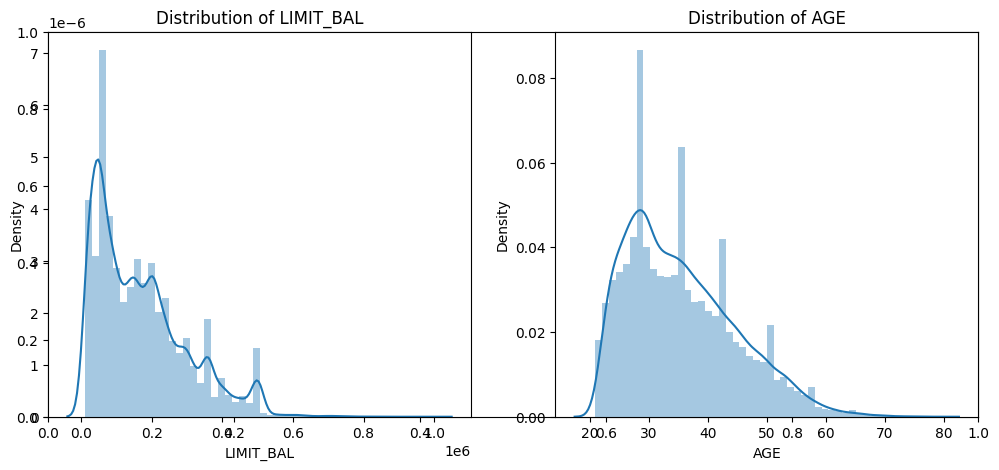

In [63]:



plt.subplots(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.distplot(df['LIMIT_BAL'])
plt.title('Distribution of LIMIT_BAL')


plt.subplot(1, 2, 2)
sns.distplot(df['AGE'])
plt.title('Distribution of AGE')
plt.show()



In [64]:
df['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64